In [118]:
# Import our dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import datetime
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

In [119]:
# Loading the dataset from the resources folder

sqf_2020_df = pd.read_csv(Path('Resources/sqf-2020.csv'))
sqf_2019_df = pd.read_csv(Path('Resources/sqf-2019.csv'))
sqf_2018_df = pd.read_csv(Path('Resources/sqf-2018.csv'))
sqf_2017_df = pd.read_csv(Path('Resources/sqf-2017.csv'))

dataFrame_list = [sqf_2019_df, sqf_2018_df, sqf_2017_df]
merge_df = pd.concat(dataFrame_list)
merge_df

,STOP_ID_ANONY,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME,STOP_FRISK_ID,Stop Frisk Time,SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED,STOP_LOCATION_PREMISES_NAME
0,1.0,1/2/2019,14:30:00,2019.0,January,Wednesday,Based on C/W on Scene,APP,POM,1,...,VESEY STREET,979667,199737,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN
1,2.0,1/8/2019,2:30:00,2019.0,January,Tuesday,Based on Self Initiated,APP,POM,1,...,WHITE STREET,982650,201326,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN
2,3.0,1/12/2019,16:54:00,2019.0,January,Saturday,Based on Radio Run,APP,POM,1,...,SPRING STREET,984063,203033,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN
3,4.0,1/14/2019,21:21:00,2019.0,January,Monday,Based on Radio Run,APP,POM,1,...,GRAND STREET,982848,202677,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN
4,5.0,1/15/2019,18:50:00,2019.0,January,Tuesday,Based on Radio Run,APP,POM,1,...,THOMPSON STREET,983100,202705,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,NaN,2017-12-01,12:20:00 PM,2017.0,December,Friday,Based on Radio Run,APP,POM,71,...,STERLING STREET,#NULL!,#NULL!,(null),(nul,(null),2.018071e+12,NaN,Y,(null)
11625,NaN,2017-12-20,4:10:00 AM,2017.0,December,Wednesday,Based on Self Initiated,APP,POM,425,...,JAMAICA AVENUE,1016693.00,187436.00,(null),PBBN,BROOKLYN,2.018075e+12,NaN,Y,(null)
11626,NaN,2017-10-07,11:45:00 PM,2017.0,October,Saturday,Based on Self Initiated,APP,POM,106,...,LINDEN BOULEVARD,#NULL!,#NULL!,(null),(nul,(null),2.018106e+12,NaN,Y,(null)
11627,NaN,2017-12-26,3:25:00 PM,2017.0,December,Tuesday,Based on Self Initiated,APP,POM,593,...,YORK AVENUE,#NULL!,#NULL!,(null),(nul,(null),2.018120e+12,NaN,Y,(null)


In [120]:
sqf_2020_df

,STOP_ID,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,STOP_LOCATION_PRECINCT,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,1/1/2020,1:12:00,2020,January,Wednesday,Based on Radio Run,APP,POM,19,...,19,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN
1,2,1/1/2020,1:11:00,2020,January,Wednesday,Based on Radio Run,APP,POM,19,...,19,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN
2,3,1/1/2020,1:11:00,2020,January,Wednesday,Based on Radio Run,APP,POM,19,...,19,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN
3,4,1/1/2020,10:18:00,2020,January,Wednesday,Based on Radio Run,APP,POM,75,...,75,D,(null),LINDEN BLVD && SHEPHERD AVE,LINDEN BLVD,1018441,181412,11208,PBBN,BROOKLYN
4,5,1/1/2020,8:45:00,2020,January,Wednesday,Based on Radio Run,APP,POM,78,...,78,B,(null),481 5 AVE,5 AVE,987763,182543,11215,PBBS,BROOKLYN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,9540,12/31/2020,0:20:00,2020,December,Thursday,Based on Radio Run,APP,POM,72,...,72,D,(null),375 57 ST,57 ST,979566,173464,11220,PBBS,BROOKLYN
9540,9541,12/29/2020,17:11:00,2020,December,Tuesday,Based on Radio Run,APP,CPT,78,...,71,B,(null),749 CROWN ST,CROWN ST,1002918,181721,11213,PBBS,BROOKLYN
9541,9542,12/12/2020,1:45:00,2020,December,Saturday,Based on Self Initiated,APP,POM,75,...,73,C,(null),424 MOTHER GASTON BLVD,MOTHER GASTON BLVD,1010145,182898,11212,PBBN,BROOKLYN
9542,9543,12/25/2020,15:45:00,2020,December,Friday,Based on Radio Run,APP,POM,73,...,73,A,(null),BROADWAY && HALSEY ST,BROADWAY,1007368,189362,(null),PBBN,BROOKLYN


In [121]:
merge_df = merge_df.replace('PM','', regex=True)
merge_df = merge_df.replace('AM','', regex=True)
sqf_2020_df = sqf_2020_df.replace('AM','', regex=True)
sqf_2020_df = sqf_2020_df.replace('PM','', regex=True)
merge_df
sqf_2020_df

,STOP_ID,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,STOP_LOCATION_PRECINCT,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,1/1/2020,1:12:00,2020,January,Wednesday,Based on Radio Run,APP,POM,19,...,19,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN
1,2,1/1/2020,1:11:00,2020,January,Wednesday,Based on Radio Run,APP,POM,19,...,19,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN
2,3,1/1/2020,1:11:00,2020,January,Wednesday,Based on Radio Run,APP,POM,19,...,19,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN
3,4,1/1/2020,10:18:00,2020,January,Wednesday,Based on Radio Run,APP,POM,75,...,75,D,(null),LINDEN BLVD && SHEPHERD AVE,LINDEN BLVD,1018441,181412,11208,PBBN,BROOKLYN
4,5,1/1/2020,8:45:00,2020,January,Wednesday,Based on Radio Run,APP,POM,78,...,78,B,(null),481 5 AVE,5 AVE,987763,182543,11215,PBBS,BROOKLYN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,9540,12/31/2020,0:20:00,2020,December,Thursday,Based on Radio Run,APP,POM,72,...,72,D,(null),375 57 ST,57 ST,979566,173464,11220,PBBS,BROOKLYN
9540,9541,12/29/2020,17:11:00,2020,December,Tuesday,Based on Radio Run,APP,CPT,78,...,71,B,(null),749 CROWN ST,CROWN ST,1002918,181721,11213,PBBS,BROOKLYN
9541,9542,12/12/2020,1:45:00,2020,December,Saturday,Based on Self Initiated,APP,POM,75,...,73,C,(null),424 MOTHER GASTON BLVD,MOTHER GASTON BLVD,1010145,182898,11212,PBBN,BROOKLYN
9542,9543,12/25/2020,15:45:00,2020,December,Friday,Based on Radio Run,APP,POM,73,...,73,A,(null),BROADWAY && HALSEY ST,BROADWAY,1007368,189362,(null),PBBN,BROOKLYN


In [122]:
# Find null values
for column in merge_df.columns:
    print(f"Column {column} has {merge_df[column].isnull().sum()} null values")


Column STOP_ID_ANONY has 22637 null values
Column STOP_FRISK_DATE has 0 null values
Column STOP_FRISK_TIME has 11013 null values
Column YEAR2 has 0 null values
Column MONTH2 has 0 null values
Column DAY2 has 0 null values
Column STOP_WAS_INITIATED has 1 null values
Column RECORD_STATUS_CODE has 0 null values
Column ISSUING_OFFICER_RANK has 0 null values
Column ISSUING_OFFICER_COMMAND_CODE has 0 null values
Column SUPERVISING_OFFICER_RANK has 0 null values
Column SUPERVISING_OFFICER_COMMAND_CODE has 0 null values
Column LOCATION_IN_OUT_CODE has 0 null values
Column JURISDICTION_CODE has 0 null values
Column JURISDICTION_DESCRIPTION has 0 null values
Column OBSERVED_DURATION_MINUTES has 0 null values
Column SUSPECTED_CRIME_DESCRIPTION has 0 null values
Column STOP_DURATION_MINUTES has 0 null values
Column OFFICER_EXPLAINED_STOP_FLAG has 0 null values
Column OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION has 8 null values
Column OTHER_PERSON_STOPPED_FLAG has 1 null values
Column SUSPECT_ARRESTED_

In [123]:
# Function checking for missing values
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [124]:
missing_values_table(merge_df)

Your selected dataframe has 87 columns.
There are 17 columns that have missing values.


,Missing Values,% of Total Values
Stop Frisk Time,25090,69.5
STOP_ID_ANONY,22637,62.7
CONSENT_GIVEN_FLG,22637,62.7
ASK_FOR_CONSENT_FLG,22637,62.7
SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED,13472,37.3
STOP_FRISK_ID,13459,37.3
STOP_LOCATION_PREMISES_NAME,13459,37.3
STOP_FRISK_TIME,11013,30.5
SUSPECT_OTHER_DESCRIPTION,2708,7.5
DEMEANOR_OF_PERSON_STOPPED,2346,6.5


In [125]:
merge_df['STOP_LOCATION_APARTMENT'].value_counts()

(null)          34147
LOBBY             145
1                  82
2                  73
6                  61
                ...  
23RD F              1
115                 1
5TH FLOOR HA        1
STAIRCASE           1
6K                  1
Name: STOP_LOCATION_APARTMENT, Length: 503, dtype: int64

In [126]:
merge_df.dtypes

STOP_ID_ANONY                                                   float64
STOP_FRISK_DATE                                                  object
STOP_FRISK_TIME                                                  object
YEAR2                                                           float64
MONTH2                                                           object
                                                                 ...   
STOP_LOCATION_BORO_NAME                                          object
STOP_FRISK_ID                                                   float64
Stop Frisk Time                                                  object
SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED     object
STOP_LOCATION_PREMISES_NAME                                      object
Length: 87, dtype: object

In [127]:
# Generate our categorical variable lists
float_columns = merge_df.dtypes[merge_df.dtypes == "float"].index.tolist()
len(float_columns)

5

In [128]:
# Check the number of unique values in each column
merge_df[float_columns]

,STOP_ID_ANONY,YEAR2,OBSERVED_DURATION_MINUTES,STOP_DURATION_MINUTES,STOP_FRISK_ID
0,1.0,2019.0,1.0,10.0,NaN
1,2.0,2019.0,1.0,10.0,NaN
2,3.0,2019.0,1.0,4.0,NaN
3,4.0,2019.0,0.0,5.0,NaN
4,5.0,2019.0,1.0,5.0,NaN
...,...,...,...,...,...
11624,NaN,2017.0,1.0,10.0,2.018071e+12
11625,NaN,2017.0,1.0,5.0,2.018075e+12
11626,NaN,2017.0,2.0,2.0,2.018106e+12
11627,NaN,2017.0,2.0,10.0,2.018120e+12


In [129]:
# Generate our categorical variable lists
object_columns = merge_df.dtypes[merge_df.dtypes == "object"].index.tolist()
len(object_columns)

80

In [130]:
# Check the number of unique values in each column
merge_df[object_columns].nunique()

STOP_FRISK_DATE                                                 1095
STOP_FRISK_TIME                                                 2110
MONTH2                                                            12
DAY2                                                               7
STOP_WAS_INITIATED                                                 4
                                                                ... 
STOP_LOCATION_PATROL_BORO_NAME                                    22
STOP_LOCATION_BORO_NAME                                           20
Stop Frisk Time                                                 1342
SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED       2
STOP_LOCATION_PREMISES_NAME                                       24
Length: 80, dtype: int64

In [131]:
# Finding the value_counts of each column
for c in merge_df.columns:
    print("---- %s ---" % c)
    print(merge_df[c].value_counts())

---- STOP_ID_ANONY ---
11783.0    1
6684.0     1
8095.0     1
11717.0    1
9860.0     1
          ..
10094.0    1
2491.0     1
5629.0     1
11521.0    1
1.0        1
Name: STOP_ID_ANONY, Length: 13459, dtype: int64
---- STOP_FRISK_DATE ---
3/31/2018     106
4/3/2019       84
2017-10-31     81
5/10/2019      74
3/23/2019      72
             ... 
2017-06-12     10
1/8/2018       10
2017-12-28      7
2017-12-25      6
1/7/2018        5
Name: STOP_FRISK_DATE, Length: 1095, dtype: int64
---- STOP_FRISK_TIME ---
1:00:00     103
2:30:00     100
0:00:00      99
6:00:00      98
5:00:00      95
           ... 
5:55:00       1
3:02:00       1
11:17:00      1
3:41:00       1
20:41:00      1
Name: STOP_FRISK_TIME, Length: 2110, dtype: int64
---- YEAR2 ---
2019.0    13459
2017.0    11629
2018.0    11008
Name: YEAR2, dtype: int64
---- MONTH2 ---
March        3437
April        3373
May          3371
June         3134
July         3058
January      3051
October      3004
August       2978
February    

Name: PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG, dtype: int64
---- PHYSICAL_FORCE_OC_SPRAY_USED_FLAG ---
(null)    36091
Y             5
Name: PHYSICAL_FORCE_OC_SPRAY_USED_FLAG, dtype: int64
---- PHYSICAL_FORCE_OTHER_FLAG ---
(null)    35136
Y           960
Name: PHYSICAL_FORCE_OTHER_FLAG, dtype: int64
---- PHYSICAL_FORCE_RESTRAINT_USED_FLAG ---
(null)    35443
Y           653
Name: PHYSICAL_FORCE_RESTRAINT_USED_FLAG, dtype: int64
---- PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG ---
Y         32698
(null)     2240
(          1158
Name: PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG, dtype: int64
---- PHYSICAL_FORCE_WEAPON_IMPACT_FLAG ---
(null)    36080
Y            16
Name: PHYSICAL_FORCE_WEAPON_IMPACT_FLAG, dtype: int64
---- BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG ---
(null)    25728
Y         10368
Name: BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG, dtype: int64
---- BACKROUND_CIRCUMSTANCES_SUSPECT_KNOWN_TO_CARRY_WEAPON_FLAG ---
(null)    34921
Y          1175
Name: BACKROUND_CIRCUMSTANCES_SUSPECT_K

2.017120e+12    1
2.962000e+03    1
4.822000e+03    1
4.244000e+03    1
2.017106e+12    1
               ..
2.017013e+12    1
2.017073e+12    1
8.730000e+03    1
2.017009e+12    1
1.000000e+00    1
Name: STOP_FRISK_ID, Length: 22637, dtype: int64
---- Stop Frisk Time ---
9:54:00     64
17:30:00    60
0:00:00     58
21:30:00    56
16:00:00    51
            ..
6:04:00      1
2:47:00      1
19:14:00     1
6:57:00      1
6:03:00      1
Name: Stop Frisk Time, Length: 1342, dtype: int64
---- SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED ---
Y    21100
N     1524
Name: SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED, dtype: int64
---- STOP_LOCATION_PREMISES_NAME ---
(null)    22611
E             3
EAST 1        2
J             1
56 MON        1
WILSON        1
101 WE        1
1819 W        1
013           1
HALLWA        1
G             1
2 AVEN        1
614 WE        1
SIDEWA        1
78 GOR        1
D             1
323 EA        1
45 STR        1
I             1

In [132]:
sqf_2020_df = sqf_2020_df.drop(['STOP_FRISK_DATE'], axis = 1)
merge_df = merge_df.drop(['STOP_FRISK_DATE'], axis = 1)
merge_df

,STOP_ID_ANONY,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_RANK,...,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME,STOP_FRISK_ID,Stop Frisk Time,SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED,STOP_LOCATION_PREMISES_NAME
0,1.0,14:30:00,2019.0,January,Wednesday,Based on C/W on Scene,APP,POM,1,SGT,...,VESEY STREET,979667,199737,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN
1,2.0,2:30:00,2019.0,January,Tuesday,Based on Self Initiated,APP,POM,1,SGT,...,WHITE STREET,982650,201326,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN
2,3.0,16:54:00,2019.0,January,Saturday,Based on Radio Run,APP,POM,1,SGT,...,SPRING STREET,984063,203033,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN
3,4.0,21:21:00,2019.0,January,Monday,Based on Radio Run,APP,POM,1,SGT,...,GRAND STREET,982848,202677,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN
4,5.0,18:50:00,2019.0,January,Tuesday,Based on Radio Run,APP,POM,1,SGT,...,THOMPSON STREET,983100,202705,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,NaN,12:20:00,2017.0,December,Friday,Based on Radio Run,APP,POM,71,SGT,...,STERLING STREET,#NULL!,#NULL!,(null),(nul,(null),2.018071e+12,NaN,Y,(null)
11625,NaN,4:10:00,2017.0,December,Wednesday,Based on Self Initiated,APP,POM,425,LSA,...,JAICA AVENUE,1016693.00,187436.00,(null),PBBN,BROOKLYN,2.018075e+12,NaN,Y,(null)
11626,NaN,11:45:00,2017.0,October,Saturday,Based on Self Initiated,APP,POM,106,SGT,...,LINDEN BOULEVARD,#NULL!,#NULL!,(null),(nul,(null),2.018106e+12,NaN,Y,(null)
11627,NaN,3:25:00,2017.0,December,Tuesday,Based on Self Initiated,APP,POM,593,SGT,...,YORK AVENUE,#NULL!,#NULL!,(null),(nul,(null),2.018120e+12,NaN,Y,(null)


In [133]:
# Drop the null columns where all values are null
sqf_2020_df = sqf_2020_df.dropna(axis='columns', how='all')
merge_df = merge_df.dropna(axis='columns', how='all')
merge_df

,STOP_ID_ANONY,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_RANK,...,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME,STOP_FRISK_ID,Stop Frisk Time,SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED,STOP_LOCATION_PREMISES_NAME
0,1.0,14:30:00,2019.0,January,Wednesday,Based on C/W on Scene,APP,POM,1,SGT,...,VESEY STREET,979667,199737,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN
1,2.0,2:30:00,2019.0,January,Tuesday,Based on Self Initiated,APP,POM,1,SGT,...,WHITE STREET,982650,201326,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN
2,3.0,16:54:00,2019.0,January,Saturday,Based on Radio Run,APP,POM,1,SGT,...,SPRING STREET,984063,203033,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN
3,4.0,21:21:00,2019.0,January,Monday,Based on Radio Run,APP,POM,1,SGT,...,GRAND STREET,982848,202677,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN
4,5.0,18:50:00,2019.0,January,Tuesday,Based on Radio Run,APP,POM,1,SGT,...,THOMPSON STREET,983100,202705,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,NaN,12:20:00,2017.0,December,Friday,Based on Radio Run,APP,POM,71,SGT,...,STERLING STREET,#NULL!,#NULL!,(null),(nul,(null),2.018071e+12,NaN,Y,(null)
11625,NaN,4:10:00,2017.0,December,Wednesday,Based on Self Initiated,APP,POM,425,LSA,...,JAICA AVENUE,1016693.00,187436.00,(null),PBBN,BROOKLYN,2.018075e+12,NaN,Y,(null)
11626,NaN,11:45:00,2017.0,October,Saturday,Based on Self Initiated,APP,POM,106,SGT,...,LINDEN BOULEVARD,#NULL!,#NULL!,(null),(nul,(null),2.018106e+12,NaN,Y,(null)
11627,NaN,3:25:00,2017.0,December,Tuesday,Based on Self Initiated,APP,POM,593,SGT,...,YORK AVENUE,#NULL!,#NULL!,(null),(nul,(null),2.018120e+12,NaN,Y,(null)


In [134]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36096 entries, 0 to 11628
Data columns (total 86 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   STOP_ID_ANONY                                                 13459 non-null  float64
 1   STOP_FRISK_TIME                                               25083 non-null  object 
 2   YEAR2                                                         36096 non-null  float64
 3   MONTH2                                                        36096 non-null  object 
 4   DAY2                                                          36096 non-null  object 
 5   STOP_WAS_INITIATED                                            36095 non-null  object 
 6   RECORD_STATUS_CODE                                            36096 non-null  object 
 7   ISSUING_OFFICER_RANK                                          36096

In [135]:
# Convert time into seconds
sqf_2020_df["TIME"] = sqf_2020_df["STOP_FRISK_TIME"].astype(str) 
merge_df["TIME"] = merge_df["STOP_FRISK_TIME"].astype(str) + merge_df["Stop Frisk Time"].astype(str)
merge_df["TIME"]

0         14:30:00nan
1          2:30:00nan
2         16:54:00nan
3         21:21:00nan
4         18:50:00nan
             ...     
11624    12:20:00 nan
11625     4:10:00 nan
11626    11:45:00 nan
11627     3:25:00 nan
11628    10:55:00 nan
Name: TIME, Length: 36096, dtype: object

In [136]:
sqf_2020_df['TIME'] = pd.to_timedelta(sqf_2020_df['TIME'])
sqf_2020_df['SECONDS'] = sqf_2020_df['TIME'].dt.total_seconds()
sqf_2020_df

,STOP_ID,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_RANK,...,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME,TIME,SECONDS
0,1,1:12:00,2020,January,Wednesday,Based on Radio Run,APP,POM,19,SGT,...,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN,01:12:00,4320.0
1,2,1:11:00,2020,January,Wednesday,Based on Radio Run,APP,POM,19,SGT,...,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN,01:11:00,4260.0
2,3,1:11:00,2020,January,Wednesday,Based on Radio Run,APP,POM,19,SGT,...,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN,01:11:00,4260.0
3,4,10:18:00,2020,January,Wednesday,Based on Radio Run,APP,POM,75,LT,...,(null),LINDEN BLVD && SHEPHERD AVE,LINDEN BLVD,1018441,181412,11208,PBBN,BROOKLYN,10:18:00,37080.0
4,5,8:45:00,2020,January,Wednesday,Based on Radio Run,APP,POM,78,SGT,...,(null),481 5 AVE,5 AVE,987763,182543,11215,PBBS,BROOKLYN,08:45:00,31500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,9540,0:20:00,2020,December,Thursday,Based on Radio Run,APP,POM,72,SGT,...,(null),375 57 ST,57 ST,979566,173464,11220,PBBS,BROOKLYN,00:20:00,1200.0
9540,9541,17:11:00,2020,December,Tuesday,Based on Radio Run,APP,CPT,78,CPT,...,(null),749 CROWN ST,CROWN ST,1002918,181721,11213,PBBS,BROOKLYN,17:11:00,61860.0
9541,9542,1:45:00,2020,December,Saturday,Based on Self Initiated,APP,POM,75,SGT,...,(null),424 MOTHER GASTON BLVD,MOTHER GASTON BLVD,1010145,182898,11212,PBBN,BROOKLYN,01:45:00,6300.0
9542,9543,15:45:00,2020,December,Friday,Based on Radio Run,APP,POM,73,LT,...,(null),BROADWAY && HALSEY ST,BROADWAY,1007368,189362,(null),PBBN,BROOKLYN,15:45:00,56700.0


In [137]:
merge_df

,STOP_ID_ANONY,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_RANK,...,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME,STOP_FRISK_ID,Stop Frisk Time,SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED,STOP_LOCATION_PREMISES_NAME,TIME
0,1.0,14:30:00,2019.0,January,Wednesday,Based on C/W on Scene,APP,POM,1,SGT,...,979667,199737,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN,14:30:00nan
1,2.0,2:30:00,2019.0,January,Tuesday,Based on Self Initiated,APP,POM,1,SGT,...,982650,201326,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN,2:30:00nan
2,3.0,16:54:00,2019.0,January,Saturday,Based on Radio Run,APP,POM,1,SGT,...,984063,203033,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN,16:54:00nan
3,4.0,21:21:00,2019.0,January,Monday,Based on Radio Run,APP,POM,1,SGT,...,982848,202677,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN,21:21:00nan
4,5.0,18:50:00,2019.0,January,Tuesday,Based on Radio Run,APP,POM,1,SGT,...,983100,202705,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN,18:50:00nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,NaN,12:20:00,2017.0,December,Friday,Based on Radio Run,APP,POM,71,SGT,...,#NULL!,#NULL!,(null),(nul,(null),2.018071e+12,NaN,Y,(null),12:20:00 nan
11625,NaN,4:10:00,2017.0,December,Wednesday,Based on Self Initiated,APP,POM,425,LSA,...,1016693.00,187436.00,(null),PBBN,BROOKLYN,2.018075e+12,NaN,Y,(null),4:10:00 nan
11626,NaN,11:45:00,2017.0,October,Saturday,Based on Self Initiated,APP,POM,106,SGT,...,#NULL!,#NULL!,(null),(nul,(null),2.018106e+12,NaN,Y,(null),11:45:00 nan
11627,NaN,3:25:00,2017.0,December,Tuesday,Based on Self Initiated,APP,POM,593,SGT,...,#NULL!,#NULL!,(null),(nul,(null),2.018120e+12,NaN,Y,(null),3:25:00 nan


In [138]:
merge_df['TIME'] = merge_df['TIME'].replace('nan','', regex=True)
merge_df['TIME']

0         14:30:00
1          2:30:00
2         16:54:00
3         21:21:00
4         18:50:00
           ...    
11624    12:20:00 
11625     4:10:00 
11626    11:45:00 
11627     3:25:00 
11628    10:55:00 
Name: TIME, Length: 36096, dtype: object

In [139]:
merge_df['TIME'] = pd.to_timedelta(merge_df['TIME'])
merge_df['SECONDS'] = merge_df['TIME'].dt.total_seconds()

In [140]:
merge_df['SECONDS']

0        52200.0
1         9000.0
2        60840.0
3        76860.0
4        67800.0
          ...   
11624    44400.0
11625    15000.0
11626    42300.0
11627    12300.0
11628    39300.0
Name: SECONDS, Length: 36096, dtype: float64

In [141]:
merge_df

,STOP_ID_ANONY,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_RANK,...,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME,STOP_FRISK_ID,Stop Frisk Time,SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED,STOP_LOCATION_PREMISES_NAME,TIME,SECONDS
0,1.0,14:30:00,2019.0,January,Wednesday,Based on C/W on Scene,APP,POM,1,SGT,...,199737,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN,14:30:00,52200.0
1,2.0,2:30:00,2019.0,January,Tuesday,Based on Self Initiated,APP,POM,1,SGT,...,201326,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN,02:30:00,9000.0
2,3.0,16:54:00,2019.0,January,Saturday,Based on Radio Run,APP,POM,1,SGT,...,203033,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN,16:54:00,60840.0
3,4.0,21:21:00,2019.0,January,Monday,Based on Radio Run,APP,POM,1,SGT,...,202677,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN,21:21:00,76860.0
4,5.0,18:50:00,2019.0,January,Tuesday,Based on Radio Run,APP,POM,1,SGT,...,202705,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN,18:50:00,67800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,NaN,12:20:00,2017.0,December,Friday,Based on Radio Run,APP,POM,71,SGT,...,#NULL!,(null),(nul,(null),2.018071e+12,NaN,Y,(null),12:20:00,44400.0
11625,NaN,4:10:00,2017.0,December,Wednesday,Based on Self Initiated,APP,POM,425,LSA,...,187436.00,(null),PBBN,BROOKLYN,2.018075e+12,NaN,Y,(null),04:10:00,15000.0
11626,NaN,11:45:00,2017.0,October,Saturday,Based on Self Initiated,APP,POM,106,SGT,...,#NULL!,(null),(nul,(null),2.018106e+12,NaN,Y,(null),11:45:00,42300.0
11627,NaN,3:25:00,2017.0,December,Tuesday,Based on Self Initiated,APP,POM,593,SGT,...,#NULL!,(null),(nul,(null),2.018120e+12,NaN,Y,(null),03:25:00,12300.0


In [142]:
sqf_2020_df = sqf_2020_df.drop(['STOP_FRISK_TIME', 'TIME', 'STOP_ID', 'SUSPECT_OTHER_DESCRIPTION'], axis=1)
sqf_2020_df

,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_RANK,SUPERVISING_OFFICER_COMMAND_CODE,LOCATION_IN_OUT_CODE,...,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME,SECONDS
0,2020,January,Wednesday,Based on Radio Run,APP,POM,19,SGT,19,(null),...,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN,4320.0
1,2020,January,Wednesday,Based on Radio Run,APP,POM,19,SGT,19,I,...,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN,4260.0
2,2020,January,Wednesday,Based on Radio Run,APP,POM,19,SGT,19,I,...,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN,4260.0
3,2020,January,Wednesday,Based on Radio Run,APP,POM,75,LT,75,O,...,D,(null),LINDEN BLVD && SHEPHERD AVE,LINDEN BLVD,1018441,181412,11208,PBBN,BROOKLYN,37080.0
4,2020,January,Wednesday,Based on Radio Run,APP,POM,78,SGT,78,I,...,B,(null),481 5 AVE,5 AVE,987763,182543,11215,PBBS,BROOKLYN,31500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,2020,December,Thursday,Based on Radio Run,APP,POM,72,SGT,72,(null),...,D,(null),375 57 ST,57 ST,979566,173464,11220,PBBS,BROOKLYN,1200.0
9540,2020,December,Tuesday,Based on Radio Run,APP,CPT,78,CPT,78,O,...,B,(null),749 CROWN ST,CROWN ST,1002918,181721,11213,PBBS,BROOKLYN,61860.0
9541,2020,December,Saturday,Based on Self Initiated,APP,POM,75,SGT,77,O,...,C,(null),424 MOTHER GASTON BLVD,MOTHER GASTON BLVD,1010145,182898,11212,PBBN,BROOKLYN,6300.0
9542,2020,December,Friday,Based on Radio Run,APP,POM,73,LT,73,S,...,A,(null),BROADWAY && HALSEY ST,BROADWAY,1007368,189362,(null),PBBN,BROOKLYN,56700.0


In [143]:
merge_df = merge_df.drop(['STOP_FRISK_TIME', 'Stop Frisk Time', 'TIME', 'STOP_ID_ANONY', 'SUSPECT_OTHER_DESCRIPTION'], axis=1)
merge_df

,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_RANK,SUPERVISING_OFFICER_COMMAND_CODE,LOCATION_IN_OUT_CODE,...,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME,STOP_FRISK_ID,SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED,STOP_LOCATION_PREMISES_NAME,SECONDS
0,2019.0,January,Wednesday,Based on C/W on Scene,APP,POM,1,SGT,1,I,...,VESEY STREET,979667,199737,(null),PBMS,MANHATTAN,NaN,NaN,NaN,52200.0
1,2019.0,January,Tuesday,Based on Self Initiated,APP,POM,1,SGT,1,O,...,WHITE STREET,982650,201326,(null),PBMS,MANHATTAN,NaN,NaN,NaN,9000.0
2,2019.0,January,Saturday,Based on Radio Run,APP,POM,1,SGT,1,I,...,SPRING STREET,984063,203033,(null),PBMS,MANHATTAN,NaN,NaN,NaN,60840.0
3,2019.0,January,Monday,Based on Radio Run,APP,POM,1,SGT,1,O,...,GRAND STREET,982848,202677,(null),PBMS,MANHATTAN,NaN,NaN,NaN,76860.0
4,2019.0,January,Tuesday,Based on Radio Run,APP,POM,1,SGT,1,O,...,THOMPSON STREET,983100,202705,(null),PBMS,MANHATTAN,NaN,NaN,NaN,67800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,2017.0,December,Friday,Based on Radio Run,APP,POM,71,SGT,71,O,...,STERLING STREET,#NULL!,#NULL!,(null),(nul,(null),2.018071e+12,Y,(null),44400.0
11625,2017.0,December,Wednesday,Based on Self Initiated,APP,POM,425,LSA,425,O,...,JAICA AVENUE,1016693.00,187436.00,(null),PBBN,BROOKLYN,2.018075e+12,Y,(null),15000.0
11626,2017.0,October,Saturday,Based on Self Initiated,APP,POM,106,SGT,106,O,...,LINDEN BOULEVARD,#NULL!,#NULL!,(null),(nul,(null),2.018106e+12,Y,(null),42300.0
11627,2017.0,December,Tuesday,Based on Self Initiated,APP,POM,593,SGT,593,(null),...,YORK AVENUE,#NULL!,#NULL!,(null),(nul,(null),2.018120e+12,Y,(null),12300.0


In [144]:
sqf_2020_df = sqf_2020_df.fillna(0)
merge_df = merge_df.fillna(0)

In [145]:
sqf_2020_df['STOP_LOCATION_X'] = sqf_2020_df['STOP_LOCATION_X'].replace('#NULL!','0', regex=True)
sqf_2020_df['STOP_LOCATION_Y'] = sqf_2020_df['STOP_LOCATION_Y'].replace('#NULL!','0', regex=True)
sqf_2020_df['STOP_LOCATION_Y']

0       222002
1       222002
2       222002
3       181412
4       182543
         ...  
9539    173464
9540    181721
9541    182898
9542    189362
9543    183865
Name: STOP_LOCATION_Y, Length: 9544, dtype: int64

In [146]:
merge_df['STOP_LOCATION_X'] = merge_df['STOP_LOCATION_X'].replace('#NULL!','0', regex=True)
merge_df['STOP_LOCATION_Y'] = merge_df['STOP_LOCATION_Y'].replace('#NULL!','0', regex=True)
merge_df['STOP_LOCATION_X']

0            979667
1            982650
2            984063
3            982848
4            983100
            ...    
11624             0
11625    1016693.00
11626             0
11627             0
11628             0
Name: STOP_LOCATION_X, Length: 36096, dtype: object

In [147]:
merge_df['SUSPECT_RACE_DESCRIPTION'] = merge_df['SUSPECT_RACE_DESCRIPTION'].replace('ASIAN / PACIFIC ISLANDER','ASIAN/PAC.ISL', regex=True)
merge_df['SUSPECT_RACE_DESCRIPTION'] = merge_df['SUSPECT_RACE_DESCRIPTION'].replace('ERICAN INDIAN/ALASKAN NATIVE','ERICAN INDIAN/ALASKAN N', regex=True)
merge_df['SUSPECT_RACE_DESCRIPTION']

0                 BLACK
1                 BLACK
2                 WHITE
3                 BLACK
4                 BLACK
              ...      
11624             BLACK
11625    WHITE HISPANIC
11626             BLACK
11627             BLACK
11628             WHITE
Name: SUSPECT_RACE_DESCRIPTION, Length: 36096, dtype: object

In [148]:
sqf_2020_df['SUSPECT_RACE_DESCRIPTION'] = sqf_2020_df['SUSPECT_RACE_DESCRIPTION'].replace('ASIAN / PACIFIC ISLANDER','ASIAN/PAC.ISL', regex=True)
sqf_2020_df['SUSPECT_RACE_DESCRIPTION'] = sqf_2020_df['SUSPECT_RACE_DESCRIPTION'].replace('ERICAN INDIAN/ALASKAN NATIVE','ERICAN INDIAN/ALASKAN N', regex=True)
sqf_2020_df['SUSPECT_RACE_DESCRIPTION']

0                BLACK
1                BLACK
2       WHITE HISPANIC
3                BLACK
4                WHITE
             ...      
9539    WHITE HISPANIC
9540             BLACK
9541             BLACK
9542             BLACK
9543             BLACK
Name: SUSPECT_RACE_DESCRIPTION, Length: 9544, dtype: object

In [149]:
merge_df['STOP_LOCATION_BORO_NAME'] = merge_df['STOP_LOCATION_BORO_NAME'].replace('STATEN ISLAND','STATEN ISL', regex=True)
sqf_2020_df['STOP_LOCATION_BORO_NAME'] = sqf_2020_df['STOP_LOCATION_BORO_NAME'].replace('STATEN ISLAND','STATEN ISL', regex=True)
merge_df['STOP_LOCATION_BORO_NAME']

0        MANHATTAN
1        MANHATTAN
2        MANHATTAN
3        MANHATTAN
4        MANHATTAN
           ...    
11624       (null)
11625     BROOKLYN
11626       (null)
11627       (null)
11628       (null)
Name: STOP_LOCATION_BORO_NAME, Length: 36096, dtype: object

In [150]:
merge_df['YEAR2'] = merge_df['YEAR2'].round(0).astype(int)
merge_df['YEAR2']

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
11624    2017
11625    2017
11626    2017
11627    2017
11628    2017
Name: YEAR2, Length: 36096, dtype: int32

In [151]:
sqf_2020_df.rename({'YEAR2': 'YEAR', 'MONTH2': 'MONTH', 'DAY2': 'DAY'}, axis=1, inplace=True)
merge_df.rename({'YEAR2': 'YEAR', 'MONTH2': 'MONTH', 'DAY2': 'DAY'}, axis=1, inplace=True)
merge_df

,YEAR,MONTH,DAY,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_RANK,SUPERVISING_OFFICER_COMMAND_CODE,LOCATION_IN_OUT_CODE,...,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME,STOP_FRISK_ID,SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED,STOP_LOCATION_PREMISES_NAME,SECONDS
0,2019,January,Wednesday,Based on C/W on Scene,APP,POM,1,SGT,1,I,...,VESEY STREET,979667,199737,(null),PBMS,MANHATTAN,0.000000e+00,0,0,52200.0
1,2019,January,Tuesday,Based on Self Initiated,APP,POM,1,SGT,1,O,...,WHITE STREET,982650,201326,(null),PBMS,MANHATTAN,0.000000e+00,0,0,9000.0
2,2019,January,Saturday,Based on Radio Run,APP,POM,1,SGT,1,I,...,SPRING STREET,984063,203033,(null),PBMS,MANHATTAN,0.000000e+00,0,0,60840.0
3,2019,January,Monday,Based on Radio Run,APP,POM,1,SGT,1,O,...,GRAND STREET,982848,202677,(null),PBMS,MANHATTAN,0.000000e+00,0,0,76860.0
4,2019,January,Tuesday,Based on Radio Run,APP,POM,1,SGT,1,O,...,THOMPSON STREET,983100,202705,(null),PBMS,MANHATTAN,0.000000e+00,0,0,67800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,2017,December,Friday,Based on Radio Run,APP,POM,71,SGT,71,O,...,STERLING STREET,0,0,(null),(nul,(null),2.018071e+12,Y,(null),44400.0
11625,2017,December,Wednesday,Based on Self Initiated,APP,POM,425,LSA,425,O,...,JAICA AVENUE,1016693.00,187436.00,(null),PBBN,BROOKLYN,2.018075e+12,Y,(null),15000.0
11626,2017,October,Saturday,Based on Self Initiated,APP,POM,106,SGT,106,O,...,LINDEN BOULEVARD,0,0,(null),(nul,(null),2.018106e+12,Y,(null),42300.0
11627,2017,December,Tuesday,Based on Self Initiated,APP,POM,593,SGT,593,(null),...,YORK AVENUE,0,0,(null),(nul,(null),2.018120e+12,Y,(null),12300.0


In [152]:
# Drop the unnamed column as it does not contribute to clustering or add value to input data
merge_df = merge_df.loc[:, ~merge_df.columns.str.contains('^index')]
merge_df

,YEAR,MONTH,DAY,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_RANK,SUPERVISING_OFFICER_COMMAND_CODE,LOCATION_IN_OUT_CODE,...,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME,STOP_FRISK_ID,SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED,STOP_LOCATION_PREMISES_NAME,SECONDS
0,2019,January,Wednesday,Based on C/W on Scene,APP,POM,1,SGT,1,I,...,VESEY STREET,979667,199737,(null),PBMS,MANHATTAN,0.000000e+00,0,0,52200.0
1,2019,January,Tuesday,Based on Self Initiated,APP,POM,1,SGT,1,O,...,WHITE STREET,982650,201326,(null),PBMS,MANHATTAN,0.000000e+00,0,0,9000.0
2,2019,January,Saturday,Based on Radio Run,APP,POM,1,SGT,1,I,...,SPRING STREET,984063,203033,(null),PBMS,MANHATTAN,0.000000e+00,0,0,60840.0
3,2019,January,Monday,Based on Radio Run,APP,POM,1,SGT,1,O,...,GRAND STREET,982848,202677,(null),PBMS,MANHATTAN,0.000000e+00,0,0,76860.0
4,2019,January,Tuesday,Based on Radio Run,APP,POM,1,SGT,1,O,...,THOMPSON STREET,983100,202705,(null),PBMS,MANHATTAN,0.000000e+00,0,0,67800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,2017,December,Friday,Based on Radio Run,APP,POM,71,SGT,71,O,...,STERLING STREET,0,0,(null),(nul,(null),2.018071e+12,Y,(null),44400.0
11625,2017,December,Wednesday,Based on Self Initiated,APP,POM,425,LSA,425,O,...,JAICA AVENUE,1016693.00,187436.00,(null),PBBN,BROOKLYN,2.018075e+12,Y,(null),15000.0
11626,2017,October,Saturday,Based on Self Initiated,APP,POM,106,SGT,106,O,...,LINDEN BOULEVARD,0,0,(null),(nul,(null),2.018106e+12,Y,(null),42300.0
11627,2017,December,Tuesday,Based on Self Initiated,APP,POM,593,SGT,593,(null),...,YORK AVENUE,0,0,(null),(nul,(null),2.018120e+12,Y,(null),12300.0


In [153]:
merge_df = merge_df.drop(['STOP_FRISK_ID', 'SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED', 
                          'STOP_LOCATION_PREMISES_NAME'], axis=1) 
merge_df

,YEAR,MONTH,DAY,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_RANK,SUPERVISING_OFFICER_COMMAND_CODE,LOCATION_IN_OUT_CODE,...,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME,SECONDS
0,2019,January,Wednesday,Based on C/W on Scene,APP,POM,1,SGT,1,I,...,C,(null),230 VESEY STREET,VESEY STREET,979667,199737,(null),PBMS,MANHATTAN,52200.0
1,2019,January,Tuesday,Based on Self Initiated,APP,POM,1,SGT,1,O,...,C,(null),9 WHITE STREET,WHITE STREET,982650,201326,(null),PBMS,MANHATTAN,9000.0
2,2019,January,Saturday,Based on Radio Run,APP,POM,1,SGT,1,I,...,D,(null),131 SPRING STREET,SPRING STREET,984063,203033,(null),PBMS,MANHATTAN,60840.0
3,2019,January,Monday,Based on Radio Run,APP,POM,1,SGT,1,O,...,(,(null),GRAND STREET && 6TH AVE,GRAND STREET,982848,202677,(null),PBMS,MANHATTAN,76860.0
4,2019,January,Tuesday,Based on Radio Run,APP,POM,1,SGT,1,O,...,D,(null),32 THOMPSON STREET,THOMPSON STREET,983100,202705,(null),PBMS,MANHATTAN,67800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,2017,December,Friday,Based on Radio Run,APP,POM,71,SGT,71,O,...,(null),(null),STERLING STREET && ROGERS AVENUE,STERLING STREET,0,0,(null),(nul,(null),44400.0
11625,2017,December,Wednesday,Based on Self Initiated,APP,POM,425,LSA,425,O,...,A,(null),123 JAICA AVENUE,JAICA AVENUE,1016693.00,187436.00,(null),PBBN,BROOKLYN,15000.0
11626,2017,October,Saturday,Based on Self Initiated,APP,POM,106,SGT,106,O,...,(null),(null),LINDEN BOULEVARD && 79 STREET,LINDEN BOULEVARD,0,0,(null),(nul,(null),42300.0
11627,2017,December,Tuesday,Based on Self Initiated,APP,POM,593,SGT,593,(null),...,(null),(null),YORK AVENUE && PROSPECT AVENUE,YORK AVENUE,0,0,(null),(nul,(null),12300.0


In [154]:
# Converting columns to lower case for sql database
# merge_df.columns= merge_df.columns.str.lower()
# sqf_2020_df.columns= sqf_2020_df.columns.str.lower()
# sqf_2020_df.columns

# col_list = sqf_2020_df.columns.values.tolist()
# sqf_2020_df.info()

In [155]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
sqf_2020_df.to_csv("clean_2020_df.csv", encoding="utf-8", index=False)

In [156]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
merge_df.to_csv("merged_df.csv", encoding="utf-8", index=False)

In [157]:
# Converting columns to lower case for sql database
# merge_df.columns= merge_df.columns.str.upper()
# sqf_2020_df.columns= sqf_2020_df.columns.str.upper()

In [158]:
# Drop Row/Column Only if All the Values are Null
merge_df = merge_df.dropna(how='all')
sqf_2020_df = sqf_2020_df.dropna(how='all')
sqf_2020_df

,YEAR,MONTH,DAY,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_RANK,SUPERVISING_OFFICER_COMMAND_CODE,LOCATION_IN_OUT_CODE,...,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME,SECONDS
0,2020,January,Wednesday,Based on Radio Run,APP,POM,19,SGT,19,(null),...,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN,4320.0
1,2020,January,Wednesday,Based on Radio Run,APP,POM,19,SGT,19,I,...,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN,4260.0
2,2020,January,Wednesday,Based on Radio Run,APP,POM,19,SGT,19,I,...,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN,4260.0
3,2020,January,Wednesday,Based on Radio Run,APP,POM,75,LT,75,O,...,D,(null),LINDEN BLVD && SHEPHERD AVE,LINDEN BLVD,1018441,181412,11208,PBBN,BROOKLYN,37080.0
4,2020,January,Wednesday,Based on Radio Run,APP,POM,78,SGT,78,I,...,B,(null),481 5 AVE,5 AVE,987763,182543,11215,PBBS,BROOKLYN,31500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,2020,December,Thursday,Based on Radio Run,APP,POM,72,SGT,72,(null),...,D,(null),375 57 ST,57 ST,979566,173464,11220,PBBS,BROOKLYN,1200.0
9540,2020,December,Tuesday,Based on Radio Run,APP,CPT,78,CPT,78,O,...,B,(null),749 CROWN ST,CROWN ST,1002918,181721,11213,PBBS,BROOKLYN,61860.0
9541,2020,December,Saturday,Based on Self Initiated,APP,POM,75,SGT,77,O,...,C,(null),424 MOTHER GASTON BLVD,MOTHER GASTON BLVD,1010145,182898,11212,PBBN,BROOKLYN,6300.0
9542,2020,December,Friday,Based on Radio Run,APP,POM,73,LT,73,S,...,A,(null),BROADWAY && HALSEY ST,BROADWAY,1007368,189362,(null),PBBN,BROOKLYN,56700.0


In [159]:
merge_df = merge_df.dropna(how='all', axis=1)
sqf_2020_df = sqf_2020_df.dropna(how='all', axis=1)
sqf_2020_df


,YEAR,MONTH,DAY,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_RANK,SUPERVISING_OFFICER_COMMAND_CODE,LOCATION_IN_OUT_CODE,...,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME,SECONDS
0,2020,January,Wednesday,Based on Radio Run,APP,POM,19,SGT,19,(null),...,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN,4320.0
1,2020,January,Wednesday,Based on Radio Run,APP,POM,19,SGT,19,I,...,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN,4260.0
2,2020,January,Wednesday,Based on Radio Run,APP,POM,19,SGT,19,I,...,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN,4260.0
3,2020,January,Wednesday,Based on Radio Run,APP,POM,75,LT,75,O,...,D,(null),LINDEN BLVD && SHEPHERD AVE,LINDEN BLVD,1018441,181412,11208,PBBN,BROOKLYN,37080.0
4,2020,January,Wednesday,Based on Radio Run,APP,POM,78,SGT,78,I,...,B,(null),481 5 AVE,5 AVE,987763,182543,11215,PBBS,BROOKLYN,31500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,2020,December,Thursday,Based on Radio Run,APP,POM,72,SGT,72,(null),...,D,(null),375 57 ST,57 ST,979566,173464,11220,PBBS,BROOKLYN,1200.0
9540,2020,December,Tuesday,Based on Radio Run,APP,CPT,78,CPT,78,O,...,B,(null),749 CROWN ST,CROWN ST,1002918,181721,11213,PBBS,BROOKLYN,61860.0
9541,2020,December,Saturday,Based on Self Initiated,APP,POM,75,SGT,77,O,...,C,(null),424 MOTHER GASTON BLVD,MOTHER GASTON BLVD,1010145,182898,11212,PBBN,BROOKLYN,6300.0
9542,2020,December,Friday,Based on Radio Run,APP,POM,73,LT,73,S,...,A,(null),BROADWAY && HALSEY ST,BROADWAY,1007368,189362,(null),PBBN,BROOKLYN,56700.0


In [160]:
# Find null values
for column in merge_df.columns:
    print(f"Column {column} has {merge_df[column].isnull().sum()} null values")

Column YEAR has 0 null values
Column MONTH has 0 null values
Column DAY has 0 null values
Column STOP_WAS_INITIATED has 0 null values
Column RECORD_STATUS_CODE has 0 null values
Column ISSUING_OFFICER_RANK has 0 null values
Column ISSUING_OFFICER_COMMAND_CODE has 0 null values
Column SUPERVISING_OFFICER_RANK has 0 null values
Column SUPERVISING_OFFICER_COMMAND_CODE has 0 null values
Column LOCATION_IN_OUT_CODE has 0 null values
Column JURISDICTION_CODE has 0 null values
Column JURISDICTION_DESCRIPTION has 0 null values
Column OBSERVED_DURATION_MINUTES has 0 null values
Column SUSPECTED_CRIME_DESCRIPTION has 0 null values
Column STOP_DURATION_MINUTES has 0 null values
Column OFFICER_EXPLAINED_STOP_FLAG has 0 null values
Column OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION has 0 null values
Column OTHER_PERSON_STOPPED_FLAG has 0 null values
Column SUSPECT_ARRESTED_FLAG has 0 null values
Column SUSPECT_ARREST_OFFENSE has 0 null values
Column SUMMONS_ISSUED_FLAG has 0 null values
Column SUMMONS_O

In [161]:
# OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION, 8 null values
# STOP_LOCATION_APARTMENT,  69 null values
# ASK_FOR_CONSENT_FLG,  22637 null  values
# CONSENT_GIVEN_FLG,   22637 null  values
# DEMEANOR_CODE,    2213 null  values
# DEMEANOR_OF_PERSON_STOPPED,  2346 null  values
# SECONDS,   8 null  values
# STOP_LOCATION_FULL_ADDRESS,   5 null  values
# STOP_LOCATION_STREET_NAME,   5 null  values
# STOP_LOCATION_APARTMENT 69  null  values

merge_df = merge_df.drop(['MONTH', 'DAY', 'ASK_FOR_CONSENT_FLG', 'CONSENT_GIVEN_FLG', 
                          'DEMEANOR_CODE', 'DEMEANOR_OF_PERSON_STOPPED', 
                          'STOP_LOCATION_APARTMENT', 'STOP_LOCATION_FULL_ADDRESS', 
                          'STOP_LOCATION_STREET_NAME'], axis=1)
sqf_2020_df = sqf_2020_df.drop(['MONTH', 'DAY','ASK_FOR_CONSENT_FLG', 'CONSENT_GIVEN_FLG', 
                               'DEMEANOR_CODE', 'DEMEANOR_OF_PERSON_STOPPED', 
                               'STOP_LOCATION_APARTMENT', 'STOP_LOCATION_FULL_ADDRESS', 
                               'STOP_LOCATION_STREET_NAME'], axis=1)
sqf_2020_df.head()
merge_df.head()

,YEAR,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_RANK,SUPERVISING_OFFICER_COMMAND_CODE,LOCATION_IN_OUT_CODE,JURISDICTION_CODE,JURISDICTION_DESCRIPTION,...,SUSPECT_EYE_COLOR,SUSPECT_HAIR_COLOR,STOP_LOCATION_PRECINCT,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME,SECONDS
0,2019,Based on C/W on Scene,APP,POM,1,SGT,1,I,P,PSB,...,BRO,BLK,1,C,979667,199737,(null),PBMS,MANHATTAN,52200.0
1,2019,Based on Self Initiated,APP,POM,1,SGT,1,O,P,PSB,...,BRO,BLK,1,C,982650,201326,(null),PBMS,MANHATTAN,9000.0
2,2019,Based on Radio Run,APP,POM,1,SGT,1,I,P,PSB,...,BLU,BLK,1,D,984063,203033,(null),PBMS,MANHATTAN,60840.0
3,2019,Based on Radio Run,APP,POM,1,SGT,1,O,P,PSB,...,(null),(null),1,(,982848,202677,(null),PBMS,MANHATTAN,76860.0
4,2019,Based on Radio Run,APP,POM,1,SGT,1,O,P,PSB,...,BLK,BLK,1,D,983100,202705,(null),PBMS,MANHATTAN,67800.0


In [162]:
# merge_df['STOP_LOCATION_APARTMENT']
# merge_df['STOP_LOCATION_ZIP_CODE'] 

# list of values of 'Marks' column
marks_list = merge_df['STOP_LOCATION_ZIP_CODE'].tolist()
marks_list

['(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',
 '(null)',

In [163]:
merge_df['STOP_LOCATION_ZIP_CODE']=='(null)'

0        True
1        True
2        True
3        True
4        True
         ... 
11624    True
11625    True
11626    True
11627    True
11628    True
Name: STOP_LOCATION_ZIP_CODE, Length: 36096, dtype: bool

In [164]:
merge_df = merge_df.drop(['STOP_LOCATION_ZIP_CODE'], axis=1)
sqf_2020_df = sqf_2020_df.drop(['STOP_LOCATION_ZIP_CODE'], axis=1)
sqf_2020_df.head()

,YEAR,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_RANK,SUPERVISING_OFFICER_COMMAND_CODE,LOCATION_IN_OUT_CODE,JURISDICTION_CODE,JURISDICTION_DESCRIPTION,...,SUSPECT_BODY_BUILD_TYPE,SUSPECT_EYE_COLOR,SUSPECT_HAIR_COLOR,STOP_LOCATION_PRECINCT,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME,SECONDS
0,2020,Based on Radio Run,APP,POM,19,SGT,19,(null),(null),(null),...,THN,BLK,BLK,19,C,997094,222002,PBMN,MANHATTAN,4320.0
1,2020,Based on Radio Run,APP,POM,19,SGT,19,I,P,PSB,...,THN,BRO,BLK,19,C,997094,222002,PBMN,MANHATTAN,4260.0
2,2020,Based on Radio Run,APP,POM,19,SGT,19,I,P,PSB,...,MED,BRO,BLK,19,C,997094,222002,PBMN,MANHATTAN,4260.0
3,2020,Based on Radio Run,APP,POM,75,LT,75,O,(null),(null),...,MED,BRO,BLK,75,D,1018441,181412,PBBN,BROOKLYN,37080.0
4,2020,Based on Radio Run,APP,POM,78,SGT,78,I,(null),(null),...,MED,BRO,BLN,78,B,987763,182543,PBBS,BROOKLYN,31500.0


In [165]:
merge_df = merge_df.drop(['OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION',
                            'SUSPECT_ARREST_OFFENSE',
                            'SUMMONS_OFFENSE_DESCRIPTION',
                            'ID_CARD_IDENTIFIES_OFFICER_FLAG',
                            'SHIELD_IDENTIFIES_OFFICER_FLAG',
                            'VERBAL_IDENTIFIES_OFFICER_FLAG',
                            'FIREARM_FLAG',
                            'KNIFE_CUTTER_FLAG',
                            'OTHER_WEAPON_FLAG',
                            'PHYSICAL_FORCE_CEW_FLAG',
                            'PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG',
                            'PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG',
                            'PHYSICAL_FORCE_OC_SPRAY_USED_FLAG',
                            'PHYSICAL_FORCE_OTHER_FLAG',
                            'PHYSICAL_FORCE_RESTRAINT_USED_FLAG',
                            'PHYSICAL_FORCE_WEAPON_IMPACT_FLAG',
                            'BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG',
                            'BACKROUND_CIRCUMSTANCES_SUSPECT_KNOWN_TO_CARRY_WEAPON_FLAG',
                            'SUSPECTS_ACTIONS_CASING_FLAG',
                            'SUSPECTS_ACTIONS_CONCEALED_POSSESSION_WEAPON_FLAG',
                            'SUSPECTS_ACTIONS_DRUG_TRANSACTIONS_FLAG',
                            'SUSPECTS_ACTIONS_IDENTIFY_CRIME_PATTERN_FLAG',
                            'SUSPECTS_ACTIONS_LOOKOUT_FLAG',
                            'SUSPECTS_ACTIONS_OTHER_FLAG',
                            'SUSPECTS_ACTIONS_PROXIMITY_TO_SCENE_FLAG',
                            'SEARCH_BASIS_ADMISSION_FLAG',
                            'SEARCH_BASIS_CONSENT_FLAG',
                            'SEARCH_BASIS_HARD_OBJECT_FLAG',
                            'SEARCH_BASIS_OUTLINE_FLAG',
                            'SUPERVISING_OFFICER_RANK',
                            'SUPERVISING_OFFICER_COMMAND_CODE',
                            'LOCATION_IN_OUT_CODE',
                             'JURISDICTION_CODE',
                             'STOP_LOCATION_PRECINCT',
                             'STOP_LOCATION_SECTOR_CODE',
                         'STOP_LOCATION_PATROL_BORO_NAME',
                         'OTHER_CONTRABAND_FLAG',
                         'SEARCH_BASIS_OTHER_FLAG',
                         'JURISDICTION_DESCRIPTION',
                         'RECORD_STATUS_CODE',
                         'ISSUING_OFFICER_COMMAND_CODE',
                         'OTHER_PERSON_STOPPED_FLAG'], axis=1)
merge_df

,YEAR,STOP_WAS_INITIATED,ISSUING_OFFICER_RANK,OBSERVED_DURATION_MINUTES,SUSPECTED_CRIME_DESCRIPTION,STOP_DURATION_MINUTES,OFFICER_EXPLAINED_STOP_FLAG,SUSPECT_ARRESTED_FLAG,SUMMONS_ISSUED_FLAG,OFFICER_IN_UNIFORM_FLAG,...,SUSPECT_RACE_DESCRIPTION,SUSPECT_HEIGHT,SUSPECT_WEIGHT,SUSPECT_BODY_BUILD_TYPE,SUSPECT_EYE_COLOR,SUSPECT_HAIR_COLOR,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_BORO_NAME,SECONDS
0,2019,Based on C/W on Scene,POM,1.0,PETIT LARCENY,10.0,Y,N,N,Y,...,BLACK,5.11,230,HEA,BRO,BLK,979667,199737,MANHATTAN,52200.0
1,2019,Based on Self Initiated,POM,1.0,GRAND LARCENY,10.0,Y,Y,N,N,...,BLACK,5.1,190,MED,BRO,BLK,982650,201326,MANHATTAN,9000.0
2,2019,Based on Radio Run,POM,1.0,PETIT LARCENY,4.0,Y,Y,N,Y,...,WHITE,5.9,250,HEA,BLU,BLK,984063,203033,MANHATTAN,60840.0
3,2019,Based on Radio Run,POM,0.0,ROBBERY,5.0,Y,N,N,Y,...,BLACK,,,(null),(null),(null),982848,202677,MANHATTAN,76860.0
4,2019,Based on Radio Run,POM,1.0,ASSAULT,5.0,Y,Y,N,N,...,BLACK,5.9,150,THN,BLK,BLK,983100,202705,MANHATTAN,67800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,2017,Based on Radio Run,POM,1.0,ROBBERY,10.0,Y,Y,N,Y,...,BLACK,#NULL!,(null),THN,BRO,BLK,0,0,(null),44400.0
11625,2017,Based on Self Initiated,POM,1.0,CPW,5.0,Y,N,N,N,...,WHITE HISPANIC,5.90,220,MED,BRO,BLK,1016693.00,187436.00,BROOKLYN,15000.0
11626,2017,Based on Self Initiated,POM,2.0,CPW,2.0,Y,Y,N,N,...,BLACK,5.10,250,HEA,BRO,BLK,0,0,(null),42300.0
11627,2017,Based on Self Initiated,POM,2.0,CRIMINAL POSSESSION OF MARIHUANA,10.0,Y,Y,N,N,...,BLACK,6.10,170,THN,BRO,BLK,0,0,(null),12300.0


In [166]:
sqf_2020_df = sqf_2020_df.drop(['OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION',
                            'SUSPECT_ARREST_OFFENSE',
                            'SUMMONS_OFFENSE_DESCRIPTION',
                            'ID_CARD_IDENTIFIES_OFFICER_FLAG',
                            'SHIELD_IDENTIFIES_OFFICER_FLAG',
                            'VERBAL_IDENTIFIES_OFFICER_FLAG',
                            'FIREARM_FLAG',
                            'KNIFE_CUTTER_FLAG',
                            'OTHER_WEAPON_FLAG',
                            'PHYSICAL_FORCE_CEW_FLAG',
                            'PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG',
                            'PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG',
                            'PHYSICAL_FORCE_OC_SPRAY_USED_FLAG',
                            'PHYSICAL_FORCE_OTHER_FLAG',
                            'PHYSICAL_FORCE_RESTRAINT_USED_FLAG',
                            'PHYSICAL_FORCE_WEAPON_IMPACT_FLAG',
                            'BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG',
                            'BACKROUND_CIRCUMSTANCES_SUSPECT_KNOWN_TO_CARRY_WEAPON_FLAG',
                            'SUSPECTS_ACTIONS_CASING_FLAG',
                            'SUSPECTS_ACTIONS_CONCEALED_POSSESSION_WEAPON_FLAG',
                            'SUSPECTS_ACTIONS_DRUG_TRANSACTIONS_FLAG',
                            'SUSPECTS_ACTIONS_IDENTIFY_CRIME_PATTERN_FLAG',
                            'SUSPECTS_ACTIONS_LOOKOUT_FLAG',
                            'SUSPECTS_ACTIONS_OTHER_FLAG',
                            'SUSPECTS_ACTIONS_PROXIMITY_TO_SCENE_FLAG',
                            'SEARCH_BASIS_ADMISSION_FLAG',
                            'SEARCH_BASIS_CONSENT_FLAG',
                            'SEARCH_BASIS_HARD_OBJECT_FLAG',
                            'SEARCH_BASIS_OUTLINE_FLAG',
                            'SUPERVISING_OFFICER_RANK',
                            'SUPERVISING_OFFICER_COMMAND_CODE',
                             'LOCATION_IN_OUT_CODE',
                             'JURISDICTION_CODE',
                             'STOP_LOCATION_PRECINCT',
                             'STOP_LOCATION_SECTOR_CODE',
                             'STOP_LOCATION_PATROL_BORO_NAME',
                             'OTHER_CONTRABAND_FLAG',
                             'SEARCH_BASIS_OTHER_FLAG',
                            'JURISDICTION_DESCRIPTION',
                               'RECORD_STATUS_CODE',
                               'ISSUING_OFFICER_COMMAND_CODE',
                               'OTHER_PERSON_STOPPED_FLAG'], axis=1)
sqf_2020_df

,YEAR,STOP_WAS_INITIATED,ISSUING_OFFICER_RANK,OBSERVED_DURATION_MINUTES,SUSPECTED_CRIME_DESCRIPTION,STOP_DURATION_MINUTES,OFFICER_EXPLAINED_STOP_FLAG,SUSPECT_ARRESTED_FLAG,SUMMONS_ISSUED_FLAG,OFFICER_IN_UNIFORM_FLAG,...,SUSPECT_RACE_DESCRIPTION,SUSPECT_HEIGHT,SUSPECT_WEIGHT,SUSPECT_BODY_BUILD_TYPE,SUSPECT_EYE_COLOR,SUSPECT_HAIR_COLOR,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_BORO_NAME,SECONDS
0,2020,Based on Radio Run,POM,1,CPW,2,Y,Y,N,Y,...,BLACK,6.1,160,THN,BLK,BLK,997094,222002,MANHATTAN,4320.0
1,2020,Based on Radio Run,POM,1,CPW,5,Y,N,N,Y,...,BLACK,6.2,180,THN,BRO,BLK,997094,222002,MANHATTAN,4260.0
2,2020,Based on Radio Run,POM,1,CPW,5,Y,N,N,Y,...,WHITE HISPANIC,5.1,165,MED,BRO,BLK,997094,222002,MANHATTAN,4260.0
3,2020,Based on Radio Run,POM,1,MENACING,10,Y,Y,N,Y,...,BLACK,6,220,MED,BRO,BLK,1018441,181412,BROOKLYN,37080.0
4,2020,Based on Radio Run,POM,0,BURGLARY,15,Y,N,N,Y,...,WHITE,5.9,170,MED,BRO,BLN,987763,182543,BROOKLYN,31500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,2020,Based on Radio Run,POM,0,ASSAULT,10,Y,Y,N,Y,...,WHITE HISPANIC,5.5,180,MED,BLK,BLK,979566,173464,BROOKLYN,1200.0
9540,2020,Based on Radio Run,CPT,1,CPSP,6,Y,N,N,Y,...,BLACK,6,200,THN,BLK,XXX,1002918,181721,BROOKLYN,61860.0
9541,2020,Based on Self Initiated,POM,1,CPW,2,Y,Y,N,Y,...,BLACK,5.8,150,THN,BRO,BLK,1010145,182898,BROOKLYN,6300.0
9542,2020,Based on Radio Run,POM,0,PETIT LARCENY,5,Y,N,N,Y,...,BLACK,6,170,THN,ZZZ,BLK,1007368,189362,BROOKLYN,56700.0


In [167]:
# # Drop row which contain '(null)' string
# indexes_to_drop = []

# for i in merge_df.index:
#     ....
#     if {make your decision here}:
#         indexes_to_drop.append(i)
#     ....

# df.drop(df.index[indexes_to_drop], inplace=True )

# # Select columns that contains the string 'AA'
# sub_df = merge_df.loc[: , (merge_df == '(null)').any()]
# print(sub_df)



# Remove all null rows
# df[df["col"].str.contains("this string")==False]
sqf_2020_df = sqf_2020_df[sqf_2020_df["STOP_LOCATION_BORO_NAME"].str.contains("(null)")==False]
sqf_2020_df = sqf_2020_df[sqf_2020_df["SUSPECT_HAIR_COLOR"].str.contains("(null)")==False]
sqf_2020_df = sqf_2020_df[sqf_2020_df["SUSPECT_EYE_COLOR"].str.contains("(null)")==False]
sqf_2020_df = sqf_2020_df[sqf_2020_df["SUSPECT_BODY_BUILD_TYPE"].str.contains("(null)")==False]
# sqf_2020_df = sqf_2020_df[sqf_2020_df["SUSPECT_REPORTED_AGE"].str.contains("(null)")==False]
# sqf_2020_df = sqf_2020_df[sqf_2020_df["OBSERVED_DURATION_MINUTES"].str.contains("(null)")==False]


merge_df = merge_df[merge_df["STOP_LOCATION_BORO_NAME"].str.contains("(null)")==False]
merge_df = merge_df[merge_df["SUSPECT_HAIR_COLOR"].str.contains("(null)")==False]
merge_df = merge_df[merge_df["SUSPECT_EYE_COLOR"].str.contains("(null)")==False]
merge_df = merge_df[merge_df["SUSPECT_BODY_BUILD_TYPE"].str.contains("(null)")==False]
# merge_df = merge_df[merge_df["SUSPECT_REPORTED_AGE"].str.contains("(null)")==False]
# merge_df = merge_df[merge_df["OBSERVED_DURATION_MINUTES"].str.contains("(null)")==False]
merge_df

C:\Users\Uzma\anaconda3\envs\PythonAdv\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,YEAR,STOP_WAS_INITIATED,ISSUING_OFFICER_RANK,OBSERVED_DURATION_MINUTES,SUSPECTED_CRIME_DESCRIPTION,STOP_DURATION_MINUTES,OFFICER_EXPLAINED_STOP_FLAG,SUSPECT_ARRESTED_FLAG,SUMMONS_ISSUED_FLAG,OFFICER_IN_UNIFORM_FLAG,...,SUSPECT_RACE_DESCRIPTION,SUSPECT_HEIGHT,SUSPECT_WEIGHT,SUSPECT_BODY_BUILD_TYPE,SUSPECT_EYE_COLOR,SUSPECT_HAIR_COLOR,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_BORO_NAME,SECONDS
0,2019,Based on C/W on Scene,POM,1.0,PETIT LARCENY,10.0,Y,N,N,Y,...,BLACK,5.11,230,HEA,BRO,BLK,979667,199737,MANHATTAN,52200.0
1,2019,Based on Self Initiated,POM,1.0,GRAND LARCENY,10.0,Y,Y,N,N,...,BLACK,5.1,190,MED,BRO,BLK,982650,201326,MANHATTAN,9000.0
2,2019,Based on Radio Run,POM,1.0,PETIT LARCENY,4.0,Y,Y,N,Y,...,WHITE,5.9,250,HEA,BLU,BLK,984063,203033,MANHATTAN,60840.0
4,2019,Based on Radio Run,POM,1.0,ASSAULT,5.0,Y,Y,N,N,...,BLACK,5.9,150,THN,BLK,BLK,983100,202705,MANHATTAN,67800.0
5,2019,Based on Radio Run,POM,1.0,BURGLARY,5.0,Y,N,N,Y,...,BLACK,5.9,150,MED,BLK,RED,980765,195773,MANHATTAN,22560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11618,2017,Based on Self Initiated,POM,2.0,CRIMINAL POSSESSION OF CONTROLLED SUBSTANCE,3.0,Y,Y,N,Y,...,WHITE HISPANIC,5.10,155,MED,BRO,BLK,999668.00,226392.00,MANHATTAN,20400.0
11619,2017,Based on Self Initiated,POM,5.0,CRIMINAL POSSESSION OF CONTROLLED SUBSTANCE,5.0,Y,Y,N,Y,...,WHITE HISPANIC,5.80,155,MED,BRO,BLK,1000075.00,225573.00,MANHATTAN,14700.0
11620,2017,Based on Radio Run,POM,1.0,CPW,15.0,Y,N,N,N,...,BLACK,5.90,180,MED,BLK,BLK,1008051.00,247302.00,BRONX,27660.0
11622,2017,Based on Radio Run,POM,1.0,ASSAULT,9.0,Y,N,N,Y,...,WHITE HISPANIC,5.80,165,THN,BRO,BLK,987179.00,150032.00,BROOKLYN,40200.0


In [168]:
# Generate our categorical variable lists
object_columns = merge_df.dtypes[merge_df.dtypes == "object"].index.tolist()
len(object_columns)

24

In [169]:
# Check the number of unique values in each column
merge_df[object_columns].nunique()

STOP_WAS_INITIATED                            5
ISSUING_OFFICER_RANK                         16
SUSPECTED_CRIME_DESCRIPTION                  29
OFFICER_EXPLAINED_STOP_FLAG                   2
SUSPECT_ARRESTED_FLAG                         2
SUMMONS_ISSUED_FLAG                           3
OFFICER_IN_UNIFORM_FLAG                       3
FRISKED_FLAG                                  3
SEARCHED_FLAG                                 3
WEAPON_FOUND_FLAG                             3
PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG        3
SUSPECTS_ACTIONS_DECRIPTION_FLAG              2
SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG        2
SUSPECT_REPORTED_AGE                         84
SUSPECT_SEX                                   7
SUSPECT_RACE_DESCRIPTION                      9
SUSPECT_HEIGHT                               78
SUSPECT_WEIGHT                              202
SUSPECT_BODY_BUILD_TYPE                      14
SUSPECT_EYE_COLOR                            15
SUSPECT_HAIR_COLOR                      

In [170]:
merge_df["STOP_LOCATION_X"].convert_dtypes().dtypes
merge_df["STOP_LOCATION_Y"].convert_dtypes().dtypes
merge_df["SUSPECT_HEIGHT"].convert_dtypes().dtypes
merge_df["SUSPECT_WEIGHT"].convert_dtypes().dtypes
merge_df["SUSPECT_REPORTED_AGE"].convert_dtypes().dtypes
merge_df[["STOP_LOCATION_X", "STOP_LOCATION_Y"]] = merge_df[["STOP_LOCATION_X", "STOP_LOCATION_Y"]].apply(pd.to_numeric)
# merge_df[["SUSPECT_HEIGHT", "SUSPECT_WEIGHT"]] = merge_df[["SUSPECT_HEIGHT", "SUSPECT_WEIGHT"]].apply(pd.to_numeric)
# merge_df["SUSPECT_REPORTED_AGE"] = merge_df["SUSPECT_REPORTED_AGE"].apply(pd.to_numeric)

In [171]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34780 entries, 0 to 11625
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   YEAR                                    34780 non-null  int32  
 1   STOP_WAS_INITIATED                      34780 non-null  object 
 2   ISSUING_OFFICER_RANK                    34780 non-null  object 
 3   OBSERVED_DURATION_MINUTES               34780 non-null  float64
 4   SUSPECTED_CRIME_DESCRIPTION             34780 non-null  object 
 5   STOP_DURATION_MINUTES                   34780 non-null  float64
 6   OFFICER_EXPLAINED_STOP_FLAG             34780 non-null  object 
 7   SUSPECT_ARRESTED_FLAG                   34780 non-null  object 
 8   SUMMONS_ISSUED_FLAG                     34780 non-null  object 
 9   OFFICER_IN_UNIFORM_FLAG                 34780 non-null  object 
 10  FRISKED_FLAG                            34780 non-null  ob

In [172]:
# Removing the unwanted rows
merge_df = merge_df[~(merge_df == 0).any(axis=1)]
sqf_2020_df = sqf_2020_df[~(sqf_2020_df == 0).any(axis=1)]
merge_df

,YEAR,STOP_WAS_INITIATED,ISSUING_OFFICER_RANK,OBSERVED_DURATION_MINUTES,SUSPECTED_CRIME_DESCRIPTION,STOP_DURATION_MINUTES,OFFICER_EXPLAINED_STOP_FLAG,SUSPECT_ARRESTED_FLAG,SUMMONS_ISSUED_FLAG,OFFICER_IN_UNIFORM_FLAG,...,SUSPECT_RACE_DESCRIPTION,SUSPECT_HEIGHT,SUSPECT_WEIGHT,SUSPECT_BODY_BUILD_TYPE,SUSPECT_EYE_COLOR,SUSPECT_HAIR_COLOR,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_BORO_NAME,SECONDS
0,2019,Based on C/W on Scene,POM,1.0,PETIT LARCENY,10.0,Y,N,N,Y,...,BLACK,5.11,230,HEA,BRO,BLK,979667.0,199737.0,MANHATTAN,52200.0
1,2019,Based on Self Initiated,POM,1.0,GRAND LARCENY,10.0,Y,Y,N,N,...,BLACK,5.1,190,MED,BRO,BLK,982650.0,201326.0,MANHATTAN,9000.0
2,2019,Based on Radio Run,POM,1.0,PETIT LARCENY,4.0,Y,Y,N,Y,...,WHITE,5.9,250,HEA,BLU,BLK,984063.0,203033.0,MANHATTAN,60840.0
4,2019,Based on Radio Run,POM,1.0,ASSAULT,5.0,Y,Y,N,N,...,BLACK,5.9,150,THN,BLK,BLK,983100.0,202705.0,MANHATTAN,67800.0
5,2019,Based on Radio Run,POM,1.0,BURGLARY,5.0,Y,N,N,Y,...,BLACK,5.9,150,MED,BLK,RED,980765.0,195773.0,MANHATTAN,22560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11618,2017,Based on Self Initiated,POM,2.0,CRIMINAL POSSESSION OF CONTROLLED SUBSTANCE,3.0,Y,Y,N,Y,...,WHITE HISPANIC,5.10,155,MED,BRO,BLK,999668.0,226392.0,MANHATTAN,20400.0
11619,2017,Based on Self Initiated,POM,5.0,CRIMINAL POSSESSION OF CONTROLLED SUBSTANCE,5.0,Y,Y,N,Y,...,WHITE HISPANIC,5.80,155,MED,BRO,BLK,1000075.0,225573.0,MANHATTAN,14700.0
11620,2017,Based on Radio Run,POM,1.0,CPW,15.0,Y,N,N,N,...,BLACK,5.90,180,MED,BLK,BLK,1008051.0,247302.0,BRONX,27660.0
11622,2017,Based on Radio Run,POM,1.0,ASSAULT,9.0,Y,N,N,Y,...,WHITE HISPANIC,5.80,165,THN,BRO,BLK,987179.0,150032.0,BROOKLYN,40200.0


In [173]:
# Removing the unwanted rows
merge_df = merge_df[~(merge_df == '(null)').any(axis=1)]
sqf_2020_df = sqf_2020_df[~(sqf_2020_df == '(null)').any(axis=1)]
# merge_df

C:\Users\Uzma\anaconda3\envs\PythonAdv\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [174]:
# Removing the unwanted rows
merge_df = merge_df[~(merge_df == '#NULL!').any(axis=1)]
sqf_2020_df = sqf_2020_df[~(sqf_2020_df == '#NULL!').any(axis=1)]

C:\Users\Uzma\anaconda3\envs\PythonAdv\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [175]:
# Removing the unwanted rows
merge_df = merge_df[~(merge_df == ' ').any(axis=1)]
sqf_2020_df = sqf_2020_df[~(sqf_2020_df == ' ').any(axis=1)]

C:\Users\Uzma\anaconda3\envs\PythonAdv\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [176]:
# Removing the unwanted rows
merge_df = merge_df[~(merge_df == '(nu').any(axis=1)]
sqf_2020_df = sqf_2020_df[~(sqf_2020_df == '(nu').any(axis=1)]

C:\Users\Uzma\anaconda3\envs\PythonAdv\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [177]:
merge_df['ISSUING_OFFICER_RANK'].value_counts

<bound method IndexOpsMixin.value_counts of 17       POM
19       POM
25       POM
37       POM
46       POM
        ... 
11576    POF
11582    POM
11604    POM
11605    POM
11609    POF
Name: ISSUING_OFFICER_RANK, Length: 3647, dtype: object>

## Binning of Column Values is Performed:

In [178]:
merge_df['ISSUING_OFFICER_RANK'].nunique()
sqf_2020_df['ISSUING_OFFICER_RANK'].nunique()

7

In [179]:
# Look at 'ISSUING_OFFICER_RANK' value counts for binning

merge_df['ISSUING_OFFICER_RANK'].value_counts()
sqf_2020_df['ISSUING_OFFICER_RANK'].value_counts()

POM    1374
POF     148
SGT      30
DTS      26
LT       12
DT3       4
CPT       3
Name: ISSUING_OFFICER_RANK, dtype: int64

In [180]:
# Choose a cutoff value and create a list of 'ISSUING_OFFICER_RANK' to be replaced

officer_rank_to_replace_merge_data = ['SGT', 'DTS', 'LT', 'DT3', 'CPT', 'LCD']
officer_rank_to_replace_2020_data = ['SGT', 'DTS', 'LT', 'DT3', 'CPT']

In [181]:
# Replace in dataframe
for rank in officer_rank_to_replace_merge_data:
    merge_df['ISSUING_OFFICER_RANK'] = merge_df['ISSUING_OFFICER_RANK'].replace(rank,"Other")
    
# Check to make sure binning was successful
merge_df['ISSUING_OFFICER_RANK'].value_counts()


# Replace in dataframe
for rank in officer_rank_to_replace_2020_data:
    sqf_2020_df['ISSUING_OFFICER_RANK'] = sqf_2020_df['ISSUING_OFFICER_RANK'].replace(rank,"Other")
    
# Check to make sure binning was successful
sqf_2020_df['ISSUING_OFFICER_RANK'].value_counts()

POM      1374
POF       148
Other      75
Name: ISSUING_OFFICER_RANK, dtype: int64

In [182]:
merge_df['SUSPECTED_CRIME_DESCRIPTION'].nunique()
sqf_2020_df['SUSPECTED_CRIME_DESCRIPTION'].nunique()


21

In [183]:
# Look at 'SUSPECTED_CRIME_DESCRIPTION' value counts for binning

my_value_count_merge_data = merge_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()
my_value_count_2020_data = sqf_2020_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()
my_value_count_2020_data

ROBBERY                                     360
PETIT LARCENY                               328
ASSAULT                                     236
CPW                                         179
BURGLARY                                    170
GRAND LARCENY                                74
OTHER                                        44
CRIMINAL MISCHIEF                            41
MENACING                                     40
GRAND LARCENY AUTO                           38
UNAUTHORIZED USE OF A VEHICLE                26
CRIMINAL TRESPASS                            15
MAKING GRAFFITI                              13
RECKLESS ENDANGERMENT                        11
FORCIBLE TOUCHING                             5
CPSP                                          4
RAPE                                          4
AUTO STRIPPIG                                 4
THEFT OF SERVICES                             2
MURDER                                        2
CRIMINAL POSSESSION OF FORGED INSTRUMENT

In [184]:
# Look at 'SUSPECTED_CRIME_DESCRIPTION' value counts for binning
my_value_count_merge_data = merge_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()
# a_list[0]
my_value_count_merge_data.index

# Look at 'SUSPECTED_CRIME_DESCRIPTION' value counts for binning
my_value_count_2020_data = sqf_2020_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()
# a_list[0]
my_value_count_2020_data.index

Index(['ROBBERY', 'PETIT LARCENY', 'ASSAULT', 'CPW', 'BURGLARY',
       'GRAND LARCENY', 'OTHER', 'CRIMINAL MISCHIEF', 'MENACING',
       'GRAND LARCENY AUTO', 'UNAUTHORIZED USE OF A VEHICLE',
       'CRIMINAL TRESPASS', 'MAKING GRAFFITI', 'RECKLESS ENDANGERMENT',
       'FORCIBLE TOUCHING', 'CPSP', 'RAPE', 'AUTO STRIPPIG',
       'THEFT OF SERVICES', 'MURDER',
       'CRIMINAL POSSESSION OF FORGED INSTRUMENT'],
      dtype='object')

In [185]:
# Getting the values that need to be binned in 'SUSPECTED_CRIME_DESCRIPTION'
my_value_count_merge_data = my_value_count_merge_data.loc[~my_value_count_merge_data.index.isin(['ROBBERY', 'PETIT LARCENY', 'ASSAULT', 'BURGLARY', 'GRAND LARCENY'])]
my_value_count_merge_data.index
crime_to_replace_merge_data = my_value_count_merge_data.index.tolist()
crime_to_replace_merge_data

# Getting the values that need to be binned in 'SUSPECTED_CRIME_DESCRIPTION'
my_value_count_2020_data = my_value_count_2020_data.loc[~my_value_count_2020_data.index.isin(['ROBBERY', 'PETIT LARCENY', 'ASSAULT', 'BURGLARY', 'GRAND LARCENY'])]
my_value_count_2020_data.index
crime_to_replace_2020_data = my_value_count_2020_data.index.tolist()
crime_to_replace_2020_data

['CPW',
 'OTHER',
 'CRIMINAL MISCHIEF',
 'MENACING',
 'GRAND LARCENY AUTO',
 'UNAUTHORIZED USE OF A VEHICLE',
 'CRIMINAL TRESPASS',
 'MAKING GRAFFITI',
 'RECKLESS ENDANGERMENT',
 'FORCIBLE TOUCHING',
 'CPSP',
 'RAPE',
 'AUTO STRIPPIG',
 'THEFT OF SERVICES',
 'MURDER',
 'CRIMINAL POSSESSION OF FORGED INSTRUMENT']

In [186]:
# Replace in dataframe
for crime in crime_to_replace_merge_data:
    merge_df['SUSPECTED_CRIME_DESCRIPTION'] = merge_df['SUSPECTED_CRIME_DESCRIPTION'].replace(crime,"Other")
    
# Check to make sure binning was successful
merge_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()


# Replace in dataframe
for crime in crime_to_replace_2020_data:
    sqf_2020_df['SUSPECTED_CRIME_DESCRIPTION'] = sqf_2020_df['SUSPECTED_CRIME_DESCRIPTION'].replace(crime,"Other")
    
# Check to make sure binning was successful
sqf_2020_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()

Other            429
ROBBERY          360
PETIT LARCENY    328
ASSAULT          236
BURGLARY         170
GRAND LARCENY     74
Name: SUSPECTED_CRIME_DESCRIPTION, dtype: int64

In [187]:
# Look at 'SUSPECTED_CRIME_DESCRIPTION' value counts for binning
new_value_count_merge_data = merge_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()
# a_list[0]
new_value_count_merge_data.index

# Look at 'SUSPECTED_CRIME_DESCRIPTION' value counts for binning
new_value_count_2020_data = sqf_2020_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()
# a_list[0]
new_value_count_2020_data.index

Index(['Other', 'ROBBERY', 'PETIT LARCENY', 'ASSAULT', 'BURGLARY',
       'GRAND LARCENY'],
      dtype='object')

In [188]:
# Again binning 'PETIT LARCENY' and 'GRAND LARCENY' togather
# Getting the values that need to be binned in 'SUSPECTED_CRIME_DESCRIPTION'
new_value_count_merge_data = new_value_count_merge_data.loc[~new_value_count_merge_data.index.isin(['ROBBERY', 'ASSAULT', 'BURGLARY', 'Other'])]
new_value_count_merge_data.index
larcency_to_replace_merge_data = new_value_count_merge_data.index.tolist()
larcency_to_replace_merge_data

# Getting the values that need to be binned in 'SUSPECTED_CRIME_DESCRIPTION'
new_value_count_2020_data = new_value_count_2020_data.loc[~new_value_count_2020_data.index.isin(['ROBBERY', 'ASSAULT', 'BURGLARY', 'Other'])]
new_value_count_2020_data.index
larcency_to_replace_2020_data = new_value_count_2020_data.index.tolist()
larcency_to_replace_2020_data

['PETIT LARCENY', 'GRAND LARCENY']

In [189]:
# Replace in dataframe
for larcency in larcency_to_replace_merge_data:
    merge_df['SUSPECTED_CRIME_DESCRIPTION'] = merge_df['SUSPECTED_CRIME_DESCRIPTION'].replace(larcency,"LARCENY")    
# Check to make sure binning was successful
merge_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()

# Replace in dataframe
for larcency in larcency_to_replace_2020_data:
    sqf_2020_df['SUSPECTED_CRIME_DESCRIPTION'] = sqf_2020_df['SUSPECTED_CRIME_DESCRIPTION'].replace(larcency,"LARCENY")    
# Check to make sure binning was successful
sqf_2020_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()


Other       429
LARCENY     402
ROBBERY     360
ASSAULT     236
BURGLARY    170
Name: SUSPECTED_CRIME_DESCRIPTION, dtype: int64

In [190]:
# Look at 'SUSPECT_BODY_BUILD_TYPE' value counts for binning
bodytype_value_count_merge_data = merge_df['SUSPECT_BODY_BUILD_TYPE'].value_counts()
# a_list[0]
bodytype_value_count_merge_data.index

# Look at 'SUSPECTED_CRIME_DESCRIPTION' value counts for binning
bodytype_value_count_2020_data = sqf_2020_df['SUSPECT_BODY_BUILD_TYPE'].value_counts()
# a_list[0]
bodytype_value_count_2020_data.index

Index(['THN', 'MED', 'HEA', 'U', 'XXX'], dtype='object')

In [191]:
# Binning 'SUSPECT_BODY_BUILD_TYPE' 
# Getting the values that need to be binned in 'SUSPECT_BODY_BUILD_TYPE'
bodytype_value_count_merge_data = bodytype_value_count_merge_data.loc[~bodytype_value_count_merge_data.index.isin(['MED', 'THN'])]
bodytype_value_count_merge_data.index
bodytype_to_replace_merge_data = bodytype_value_count_merge_data.index.tolist()
bodytype_to_replace_merge_data

# Getting the values that need to be binned in 'SUSPECTED_CRIME_DESCRIPTION'
bodytype_value_count_2020_data = bodytype_value_count_2020_data.loc[~bodytype_value_count_2020_data.index.isin(['MED', 'THN'])]
bodytype_value_count_2020_data.index
bodytype_to_replace_2020_data = bodytype_value_count_2020_data.index.tolist()
bodytype_to_replace_2020_data

['HEA', 'U', 'XXX']

In [192]:
# Replace in dataframe
for bodytype in bodytype_to_replace_merge_data:
    merge_df['SUSPECT_BODY_BUILD_TYPE'] = merge_df['SUSPECT_BODY_BUILD_TYPE'].replace(bodytype,"Other")    
# Check to make sure binning was successful
merge_df['SUSPECT_BODY_BUILD_TYPE'].value_counts()

# Replace in dataframe
for bodytype in bodytype_to_replace_2020_data:
    sqf_2020_df['SUSPECT_BODY_BUILD_TYPE'] = sqf_2020_df['SUSPECT_BODY_BUILD_TYPE'].replace(bodytype,"Other")    
# Check to make sure binning was successful
sqf_2020_df['SUSPECT_BODY_BUILD_TYPE'].value_counts()

THN      838
MED      563
Other    196
Name: SUSPECT_BODY_BUILD_TYPE, dtype: int64

In [193]:
# Look at 'SUSPECT_EYE_COLOR' value counts for binning
eyecolor_value_count_merge_data = merge_df['SUSPECT_EYE_COLOR'].value_counts()
# a_list[0]
eyecolor_value_count_merge_data.index

# Look at 'SUSPECTED_CRIME_DESCRIPTION' value counts for binning
eyecolor_value_count_2020_data = sqf_2020_df['SUSPECT_EYE_COLOR'].value_counts()
# a_list[0]
eyecolor_value_count_2020_data.index

Index(['BRO', 'BLK', 'BLU', 'ZZZ', 'GRN', 'HAZ', 'OTH', 'GRY'], dtype='object')

In [194]:
# Binning 'SUSPECT_EYE_COLOR' 
# Getting the values that need to be binned in 'SUSPECT_EYE_COLOR'
eyecolor_value_count_merge_data = eyecolor_value_count_merge_data.loc[~eyecolor_value_count_merge_data.index.isin(['BLK', 'BRO', 'BLU'])]
eyecolor_value_count_merge_data.index
eyecolor_to_replace_merge_data = eyecolor_value_count_merge_data.index.tolist()
eyecolor_to_replace_merge_data

# Getting the values that need to be binned in 'SUSPECTED_CRIME_DESCRIPTION'
eyecolor_value_count_2020_data = eyecolor_value_count_2020_data.loc[~eyecolor_value_count_2020_data.index.isin(['BLK', 'BRO', 'BLU'])]
eyecolor_value_count_2020_data.index
eyecolor_to_replace_2020_data = eyecolor_value_count_2020_data.index.tolist()
eyecolor_to_replace_2020_data

['ZZZ', 'GRN', 'HAZ', 'OTH', 'GRY']

In [195]:
# Replace in dataframe
for eyecolor in eyecolor_to_replace_merge_data:
    merge_df['SUSPECT_EYE_COLOR'] = merge_df['SUSPECT_EYE_COLOR'].replace(eyecolor,"Other")    
# Check to make sure binning was successful
merge_df['SUSPECT_EYE_COLOR'].value_counts()

# Replace in dataframe
for eyecolor in eyecolor_to_replace_2020_data:
    sqf_2020_df['SUSPECT_EYE_COLOR'] = sqf_2020_df['SUSPECT_EYE_COLOR'].replace(eyecolor,"Other")    
# Check to make sure binning was successful
sqf_2020_df['SUSPECT_EYE_COLOR'].value_counts()

BRO      1331
BLK       161
Other      71
BLU        34
Name: SUSPECT_EYE_COLOR, dtype: int64

In [196]:
# Look at 'SUSPECT_EYE_COLOR' value counts for binning
haircolor_value_count_merge_data = merge_df['SUSPECT_HAIR_COLOR'].value_counts()
# a_list[0]
haircolor_value_count_merge_data.index

# Look at 'SUSPECTED_CRIME_DESCRIPTION' value counts for binning
haircolor_value_count_2020_data = sqf_2020_df['SUSPECT_HAIR_COLOR'].value_counts()
# a_list[0]
haircolor_value_count_2020_data.index

Index(['BLK', 'BRO', 'BLD', 'GRY', 'BLN', 'XXX', 'RED', 'ZZZ', 'SDY', 'WHI',
       'ORG'],
      dtype='object')

In [197]:
# Binning 'SUSPECT_HAIR_COLOR' 
# Getting the values that need to be binned in 'SUSPECT_EYE_COLOR'
haircolor_value_count_merge_data = haircolor_value_count_merge_data.loc[~haircolor_value_count_merge_data.index.isin(['BLK', 'BLN'])]
haircolor_value_count_merge_data.index
haircolor_to_replace_merge_data = haircolor_value_count_merge_data.index.tolist()
haircolor_to_replace_merge_data

# Getting the values that need to be binned in 'SUSPECTED_CRIME_DESCRIPTION'
haircolor_value_count_2020_data = haircolor_value_count_2020_data.loc[~haircolor_value_count_2020_data.index.isin(['BLK', 'BLN'])]
haircolor_value_count_2020_data.index
haircolor_to_replace_2020_data = haircolor_value_count_2020_data.index.tolist()
haircolor_to_replace_2020_data

['BRO', 'BLD', 'GRY', 'XXX', 'RED', 'ZZZ', 'SDY', 'WHI', 'ORG']

In [198]:
# Replace in dataframe
for haircolor in haircolor_to_replace_merge_data:
    merge_df['SUSPECT_HAIR_COLOR'] = merge_df['SUSPECT_HAIR_COLOR'].replace(haircolor,"Other")    
# Check to make sure binning was successful
merge_df['SUSPECT_HAIR_COLOR'].value_counts()

# Replace in dataframe
for haircolor in haircolor_to_replace_2020_data:
    sqf_2020_df['SUSPECT_HAIR_COLOR'] = sqf_2020_df['SUSPECT_HAIR_COLOR'].replace(haircolor,"Other")    
# Check to make sure binning was successful
sqf_2020_df['SUSPECT_HAIR_COLOR'].value_counts()

BLK      1165
Other     406
BLN        26
Name: SUSPECT_HAIR_COLOR, dtype: int64

In [199]:
sqf_2020_df.shape

(1597, 28)

In [200]:
merge_df.shape

(3647, 28)

In [201]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
sqf_2020_df.to_csv("flask_2020_df.csv", encoding="utf-8", index=False)

In [202]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
merge_df.to_csv("flask_merged_df.csv", encoding="utf-8", index=False)

PermissionError: [Errno 13] Permission denied: 'flask_merged_df.csv'

In [203]:
# Drop the outcome column and create X features from merge_df
X_merge = merge_df.drop(["SUMMONS_ISSUED_FLAG"], axis=1)
X_merge.head()
y = merge_df["SUMMONS_ISSUED_FLAG"]
y
# Drop the outcome column and create X features from sqf_2020_df
X_sqf_2020 = sqf_2020_df.drop(["SUMMONS_ISSUED_FLAG"], axis=1)
X_sqf_2020.head()
y = sqf_2020_df["SUMMONS_ISSUED_FLAG"]
#y

In [204]:
X_merge.shape

(3647, 27)

In [205]:
X_sqf_2020.shape

(1597, 27)

###  Converting Categorical Data to Numeric:

In [206]:
# label encoding max categories columns
X_merge['ISSUING_OFFICER_RANK'] = LabelEncoder().fit_transform(X_merge['ISSUING_OFFICER_RANK'])
X_merge['ISSUING_OFFICER_RANK']

# label encoding max categories columns
X_sqf_2020['ISSUING_OFFICER_RANK'] = LabelEncoder().fit_transform(X_sqf_2020['ISSUING_OFFICER_RANK'])
X_sqf_2020['ISSUING_OFFICER_RANK']

3       2
12      2
15      2
20      2
24      2
       ..
9520    2
9527    2
9530    2
9536    2
9537    2
Name: ISSUING_OFFICER_RANK, Length: 1597, dtype: int32

In [207]:
# label encoding max categories columns
X_merge['ISSUING_OFFICER_RANK'] = LabelEncoder().fit_transform(X_merge['ISSUING_OFFICER_RANK'])
X_merge['ISSUING_OFFICER_RANK']

# label encoding max categories columns
X_sqf_2020['ISSUING_OFFICER_RANK'] = LabelEncoder().fit_transform(X_sqf_2020['ISSUING_OFFICER_RANK'])
X_sqf_2020['ISSUING_OFFICER_RANK']

3       2
12      2
15      2
20      2
24      2
       ..
9520    2
9527    2
9530    2
9536    2
9537    2
Name: ISSUING_OFFICER_RANK, Length: 1597, dtype: int64

In [208]:
# label encoding max categories columns
X_merge['STOP_LOCATION_BORO_NAME'] = LabelEncoder().fit_transform(X_merge['STOP_LOCATION_BORO_NAME'])
X_merge['STOP_LOCATION_BORO_NAME']

# label encoding max categories columns
X_sqf_2020['STOP_LOCATION_BORO_NAME'] = LabelEncoder().fit_transform(X_sqf_2020['STOP_LOCATION_BORO_NAME'])
X_sqf_2020['STOP_LOCATION_BORO_NAME']

3       1
12      1
15      0
20      1
24      3
       ..
9520    0
9527    1
9530    0
9536    3
9537    0
Name: STOP_LOCATION_BORO_NAME, Length: 1597, dtype: int32

In [209]:
# label encoding max categories columns
X_merge['SUSPECT_EYE_COLOR'] = LabelEncoder().fit_transform(X_merge['SUSPECT_EYE_COLOR'])
X_merge['SUSPECT_EYE_COLOR']

# label encoding max categories columns
X_sqf_2020['SUSPECT_EYE_COLOR'] = LabelEncoder().fit_transform(X_sqf_2020['SUSPECT_EYE_COLOR'])
X_sqf_2020['SUSPECT_EYE_COLOR']

3       2
12      0
15      2
20      2
24      2
       ..
9520    2
9527    2
9530    2
9536    2
9537    2
Name: SUSPECT_EYE_COLOR, Length: 1597, dtype: int32

In [210]:
# label encoding max categories columns
X_merge['SUSPECT_HAIR_COLOR'] = LabelEncoder().fit_transform(X_merge['SUSPECT_HAIR_COLOR'])
X_merge['SUSPECT_HAIR_COLOR']

# label encoding max categories columns
X_sqf_2020['SUSPECT_HAIR_COLOR'] = LabelEncoder().fit_transform(X_sqf_2020['SUSPECT_HAIR_COLOR'])
X_sqf_2020['SUSPECT_HAIR_COLOR']

3       0
12      0
15      0
20      0
24      2
       ..
9520    0
9527    0
9530    0
9536    0
9537    0
Name: SUSPECT_HAIR_COLOR, Length: 1597, dtype: int32

In [211]:
# label encoding max categories columns
X_merge['SUSPECT_BODY_BUILD_TYPE'] = LabelEncoder().fit_transform(X_merge['SUSPECT_BODY_BUILD_TYPE'])
X_merge['SUSPECT_BODY_BUILD_TYPE']

# label encoding max categories columns
X_sqf_2020['SUSPECT_BODY_BUILD_TYPE'] = LabelEncoder().fit_transform(X_sqf_2020['SUSPECT_BODY_BUILD_TYPE'])
X_sqf_2020['SUSPECT_BODY_BUILD_TYPE']

3       0
12      0
15      2
20      2
24      0
       ..
9520    0
9527    0
9530    2
9536    2
9537    2
Name: SUSPECT_BODY_BUILD_TYPE, Length: 1597, dtype: int32

In [212]:
# label encoding max categories columns
X_merge['SUSPECT_RACE_DESCRIPTION'] = LabelEncoder().fit_transform(X_merge['SUSPECT_RACE_DESCRIPTION'])
X_merge['SUSPECT_RACE_DESCRIPTION']

# label encoding max categories columns
X_sqf_2020['SUSPECT_RACE_DESCRIPTION'] = LabelEncoder().fit_transform(X_sqf_2020['SUSPECT_RACE_DESCRIPTION'])
X_sqf_2020['SUSPECT_RACE_DESCRIPTION']

3       1
12      1
15      5
20      1
24      5
       ..
9520    1
9527    3
9530    5
9536    1
9537    1
Name: SUSPECT_RACE_DESCRIPTION, Length: 1597, dtype: int32

In [213]:
# label encoding max categories columns
X_merge['SUSPECTED_CRIME_DESCRIPTION'] = LabelEncoder().fit_transform(X_merge['SUSPECTED_CRIME_DESCRIPTION'])
X_merge['SUSPECTED_CRIME_DESCRIPTION']

# label encoding max categories columns
X_sqf_2020['SUSPECTED_CRIME_DESCRIPTION'] = LabelEncoder().fit_transform(X_sqf_2020['SUSPECTED_CRIME_DESCRIPTION'])
X_sqf_2020['SUSPECTED_CRIME_DESCRIPTION']

3       3
12      2
15      1
20      2
24      3
       ..
9520    4
9527    1
9530    4
9536    4
9537    3
Name: SUSPECTED_CRIME_DESCRIPTION, Length: 1597, dtype: int32

In [214]:
# label encoding max categories columns
X_merge['STOP_WAS_INITIATED'] = LabelEncoder().fit_transform(X_merge['STOP_WAS_INITIATED'])
X_merge['STOP_WAS_INITIATED']

# label encoding max categories columns
X_sqf_2020['STOP_WAS_INITIATED'] = LabelEncoder().fit_transform(X_sqf_2020['STOP_WAS_INITIATED'])
X_sqf_2020['STOP_WAS_INITIATED']

3       1
12      1
15      1
20      1
24      1
       ..
9520    1
9527    1
9530    1
9536    1
9537    1
Name: STOP_WAS_INITIATED, Length: 1597, dtype: int32

In [215]:
# label encoding max categories columns
X_merge['SUSPECTED_CRIME_DESCRIPTION'] = LabelEncoder().fit_transform(X_merge['SUSPECTED_CRIME_DESCRIPTION'])
X_merge['SUSPECTED_CRIME_DESCRIPTION']

# label encoding max categories columns
X_sqf_2020['SUSPECTED_CRIME_DESCRIPTION'] = LabelEncoder().fit_transform(X_sqf_2020['SUSPECTED_CRIME_DESCRIPTION'])
X_sqf_2020['SUSPECTED_CRIME_DESCRIPTION']

3       3
12      2
15      1
20      2
24      3
       ..
9520    4
9527    1
9530    4
9536    4
9537    3
Name: SUSPECTED_CRIME_DESCRIPTION, Length: 1597, dtype: int64

In [216]:
# label encoding max categories columns
X_merge['SUSPECT_SEX'] = LabelEncoder().fit_transform(X_merge['SUSPECT_SEX'])
X_merge['SUSPECT_SEX']

# label encoding max categories columns
X_sqf_2020['SUSPECT_SEX'] = LabelEncoder().fit_transform(X_sqf_2020['SUSPECT_SEX'])
X_sqf_2020['SUSPECT_SEX']

3       1
12      1
15      1
20      1
24      1
       ..
9520    1
9527    1
9530    1
9536    1
9537    1
Name: SUSPECT_SEX, Length: 1597, dtype: int32

In [217]:
X_merge

,YEAR,STOP_WAS_INITIATED,ISSUING_OFFICER_RANK,OBSERVED_DURATION_MINUTES,SUSPECTED_CRIME_DESCRIPTION,STOP_DURATION_MINUTES,OFFICER_EXPLAINED_STOP_FLAG,SUSPECT_ARRESTED_FLAG,OFFICER_IN_UNIFORM_FLAG,FRISKED_FLAG,...,SUSPECT_RACE_DESCRIPTION,SUSPECT_HEIGHT,SUSPECT_WEIGHT,SUSPECT_BODY_BUILD_TYPE,SUSPECT_EYE_COLOR,SUSPECT_HAIR_COLOR,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_BORO_NAME,SECONDS
17,2019,2,2,1.0,2,15.0,N,Y,N,N,...,1,5.11,165,2,2,0,984713.0,203398.0,2,52200.0
19,2019,1,2,4.0,2,30.0,Y,Y,Y,Y,...,1,6.1,160,2,2,0,980875.0,194871.0,2,83700.0
25,2019,0,2,1.0,2,16.0,Y,Y,Y,N,...,4,5.2,110,2,2,2,984724.0,203415.0,2,67440.0
37,2019,1,2,1.0,2,10.0,Y,Y,Y,N,...,4,5.1,200,0,3,2,983855.0,201569.0,2,51720.0
46,2019,1,2,5.0,4,20.0,N,Y,Y,N,...,3,5.8,145,0,2,0,982327.0,201274.0,2,83100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11576,2017,1,1,1.0,4,4.0,Y,Y,Y,Y,...,4,5.10,170,0,3,2,925414.0,129472.0,4,21060.0
11582,2017,1,2,1.0,4,20.0,Y,Y,Y,N,...,1,5.00,120,2,2,0,930826.0,131814.0,4,8100.0
11604,2017,1,2,1.0,4,3.0,Y,Y,N,Y,...,4,6.20,185,2,1,2,927273.0,142375.0,4,14640.0
11605,2017,1,2,1.0,4,3.0,Y,Y,N,Y,...,4,6.10,190,2,2,0,927273.0,142375.0,4,14640.0


In [218]:
X_sqf_2020

,YEAR,STOP_WAS_INITIATED,ISSUING_OFFICER_RANK,OBSERVED_DURATION_MINUTES,SUSPECTED_CRIME_DESCRIPTION,STOP_DURATION_MINUTES,OFFICER_EXPLAINED_STOP_FLAG,SUSPECT_ARRESTED_FLAG,OFFICER_IN_UNIFORM_FLAG,FRISKED_FLAG,...,SUSPECT_RACE_DESCRIPTION,SUSPECT_HEIGHT,SUSPECT_WEIGHT,SUSPECT_BODY_BUILD_TYPE,SUSPECT_EYE_COLOR,SUSPECT_HAIR_COLOR,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_BORO_NAME,SECONDS
3,2020,1,2,1,3,10,Y,Y,Y,Y,...,1,6,220,0,2,0,1018441,181412,1,37080.0
12,2020,1,2,2,2,6,Y,Y,Y,Y,...,1,5.11,175,0,0,0,987495,190615,1,58560.0
15,2020,1,2,3,1,5,N,Y,Y,Y,...,5,5.8,160,2,2,0,1006098,232576,0,4440.0
20,2020,1,2,1,2,1,N,Y,Y,N,...,1,5.1,165,2,2,0,986497,192168,1,13500.0
24,2020,1,2,1,3,25,N,Y,Y,N,...,5,6,210,0,2,2,1026183,206217,3,17820.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9520,2020,1,2,1,4,4,Y,Y,Y,Y,...,1,6.1,230,0,2,0,1010372,251078,0,55140.0
9527,2020,1,2,1,1,10,Y,Y,Y,N,...,3,5.9,150,0,2,0,996508,176285,1,61500.0
9530,2020,1,2,1,4,4,Y,Y,Y,Y,...,5,5.7,150,2,2,0,1011743,255374,0,84720.0
9536,2020,1,2,2,4,11,N,Y,Y,N,...,1,5.11,150,2,2,0,1026785,203046,3,78240.0


In [224]:
# Converting to numnerical values for training data
X_train = pd.get_dummies(X_merge)
y_train = pd.get_dummies(y)

print (len(X_train.columns))
# print (y_train.columns)


230


In [225]:
# Converting to numnerical values for testing data
X_test = pd.get_dummies(X_sqf_2020)
y_test = pd.get_dummies(y)

print (len(X_test.columns))



171


### Scaling the Data:

In [226]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler()

# Fitting the scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_train_scaled

array([[ 0.91014818,  2.34929249,  0.39543412, ..., -0.01656119,
        -0.01656119, -0.04059432],
       [ 0.91014818,  0.1818577 ,  0.39543412, ..., -0.01656119,
        -0.01656119, -0.04059432],
       [ 0.91014818, -1.98557709,  0.39543412, ..., -0.01656119,
        -0.01656119, -0.04059432],
       ...,
       [-1.57809051,  0.1818577 ,  0.39543412, ..., -0.01656119,
        -0.01656119, -0.04059432],
       [-1.57809051,  0.1818577 ,  0.39543412, ..., -0.01656119,
        -0.01656119, -0.04059432],
       [-1.57809051,  0.1818577 , -1.81644968, ..., -0.01656119,
        -0.01656119, -0.04059432]])

In [228]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler()

# Fitting the scaler
X_scaler = scaler.fit(X_test)

# Scaling data
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled

array([[ 0.        ,  0.24017743,  0.37644631, ..., -0.02503131,
        -0.03541071, -0.05010974],
       [ 0.        ,  0.24017743,  0.37644631, ..., -0.02503131,
        -0.03541071, -0.05010974],
       [ 0.        ,  0.24017743,  0.37644631, ..., -0.02503131,
        -0.03541071, -0.05010974],
       ...,
       [ 0.        ,  0.24017743,  0.37644631, ..., -0.02503131,
        -0.03541071, -0.05010974],
       [ 0.        ,  0.24017743,  0.37644631, ..., -0.02503131,
        -0.03541071, -0.05010974],
       [ 0.        ,  0.24017743,  0.37644631, ..., -0.02503131,
        -0.03541071, -0.05010974]])

In [242]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import resample

In [248]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 1.0


In [249]:
feature_importances = clf.feature_importances_

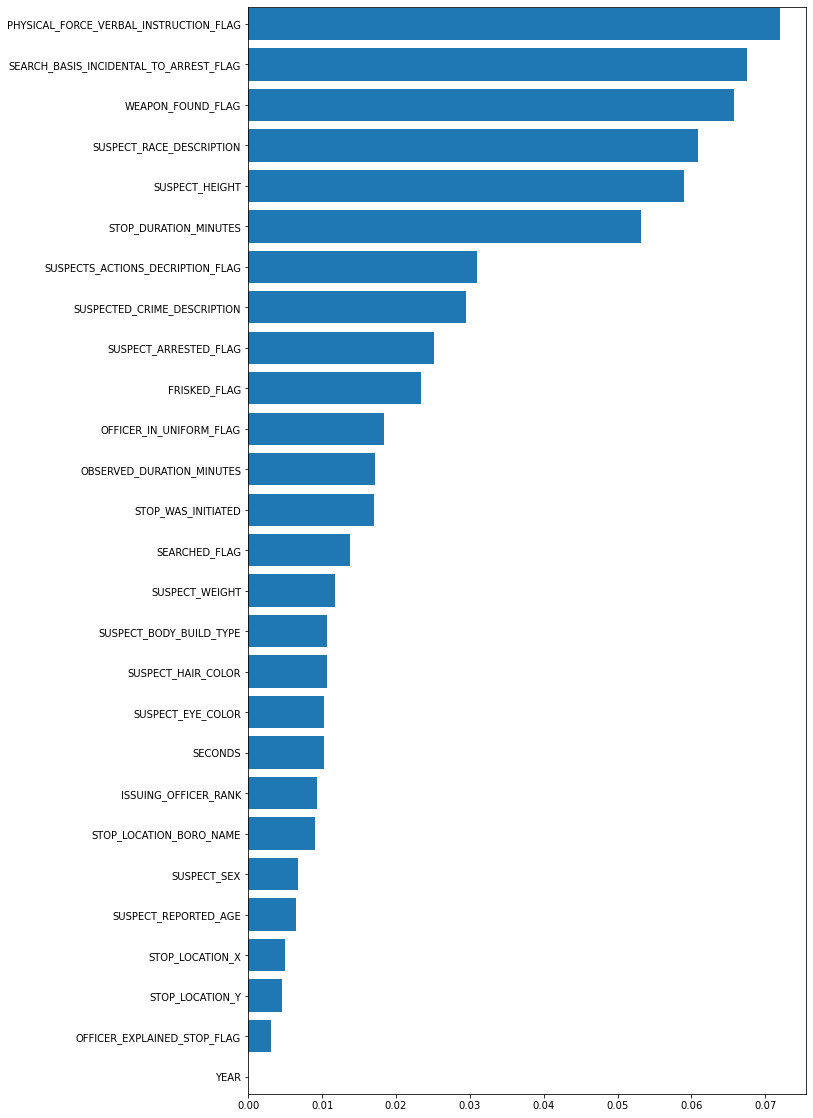

In [251]:
features = sorted(zip(X_merge.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,20)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()